### Initializations

In [2]:

expt_path='C:\\_Data\\Coherence\\Tuning_2024_06_18\\'
cfg_file = 'coherence2405.yml'

#expt_path='C:\\_Data\\LLqub2\\Tuning_2024_05_12\\'
#cfg_file = 'autocalibration_cfg.yml'


# %matplotlib widget
%matplotlib inline

%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import os
import sys
import json
import cProfile

from scipy.fft import fft, fftfreq

from slab.instruments.instrumentmanager import InstrumentManager
#from slab.instruments.instrumenttypes import Instrument
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
import experiments as meas
import autocalib_config as cfg

import config

# Figure params
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams.update({'font.size': 13})


print('Data will be stored in', expt_path)

import importlib 
importlib.reload(meas)

# Results config file:
cfg_path = os.getcwd() + '\\' + cfg_file
#print('Results config will be', cfg_path)
#cfg_path = expt_path + cfg_file
cfg_file = cfg_path 
auto_cfg = config.load(cfg_path)

auto_cfg

# Connect to instruments 
im = InstrumentManager(ns_address='192.168.137.1') # BF5

soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)
print(auto_cfg['aliases']['soc'])
print(soc.description())

num_qubits = 4


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data will be stored in C:\_Data\Coherence\Tuning_2024_06_18\
imported experiments.clifford_averager_program
imported experiments.fitting
imported experiments.qram_protocol_timestepped
imported experiments.single_qubit.acstarkshift_spectroscopy
imported experiments.single_qubit.amplitude_rabi
imported experiments.single_qubit.crud
imported experiments.single_qubit.DONOTUSE_ramsey_ef
imported experiments.single_qubit.DONOTUSE_randbench
imported experiments.single_qubit.length_rabi
imported experiments.single_qubit.pulse_probe_ef_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.pulse_probe_spectroscopy_test
imported experiments.single_qubit.rb_ziqian
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.rfsoc_tof_calibration
imported experiments.single_qubit.SingleRB
imported experiments.single_qubit.single_sh

Note: make sure you set your ADC/DAC channels correctly. This code does not automatically fill in the ADC/DAC into your configuration file, so you should check yourself to make sure these values are correct. 

In [126]:
auto_cfg = config.load(cfg_path)

auto_cfg

{'aliases': {'soc': 'Qick233'},
 'device': {'qubit': {'T1': [26.85, 5.3, 28.65, 22.91, 0.0, 0.0],
   'T2e': [200, 200, 200, 200, 200, 200],
   'T2r': [41.0, 9.69, 32.61, 15.98, 100, 100],
   'f_EgGf': [2000, 2000, 2000, 2000, 2000, 2000],
   'f_ef': [3470, 3332.9415, 3372.0636, 3568.6965, 3000, 3000],
   'f_ge': [3653.7711, 3516.0218, 3552.3094, 3751.2724, 3300, 3300],
   'kappa': [0.1827, 0.2439, 0.208, 0.2421, 0, 0],
   'pulses': {'hpi_ge': {'gain': [500, 500, 500, 500, 500, 500],
     'sigma': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
     'type': ['gauss', 'gauss', 'gauss', 'gauss', 'gauss', 'gauss']},
    'pi_EgGf': {'gain': [10000, 10000, 10000, 10000, 10000, 10000],
     'sigma': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
     'type': ['gauss', 'gauss', 'gauss', 'gauss', 'gauss', 'gauss']},
    'pi_ef': {'gain': [9563, 3985, 10000, 6787, 10000, 10000],
     'sigma': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
     'type': ['gauss', 'gauss', 'gauss', 'gauss', 'gauss', 'gauss']},
    'pi_ge': {'gain': [8635, 7729

### Time of Flight (TOF)

TOF measures the time it takes for the signal to run through the wires. It will give us the time in clock ticks that we should wait to make a measurements 

215 307
readout freq 6000 +/- 167.6742390401742


  0%|          | 0/1000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00033_adc_trig_offset_calibration_qubit0.h5


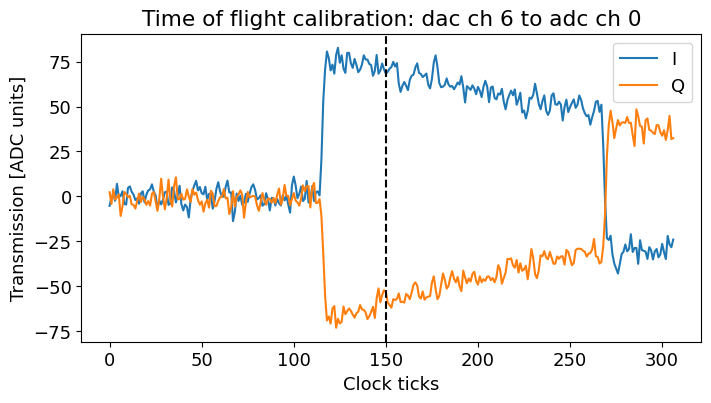

In [37]:
i = 0
tof = cfg.make_tof(soc, expt_path, cfg_path, i, im=im, go=True)

## Resonator Spectroscopy 

Run resonator spectroscopy for all resonators by choosing a large frequency scan to look over. The scan will then find the different resonators and fill in the config file with their respective frequencies. In the autocalibration, there will be a finer sweep of each resonator to more accurately find its frequency. The frequencies are saved in <code>auto_cfg.device.readout.frequency</code>

### Coarse 

  0%|          | 0/5000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00004_resonator_spectroscopy_coarse.h5
number of peaks: 162


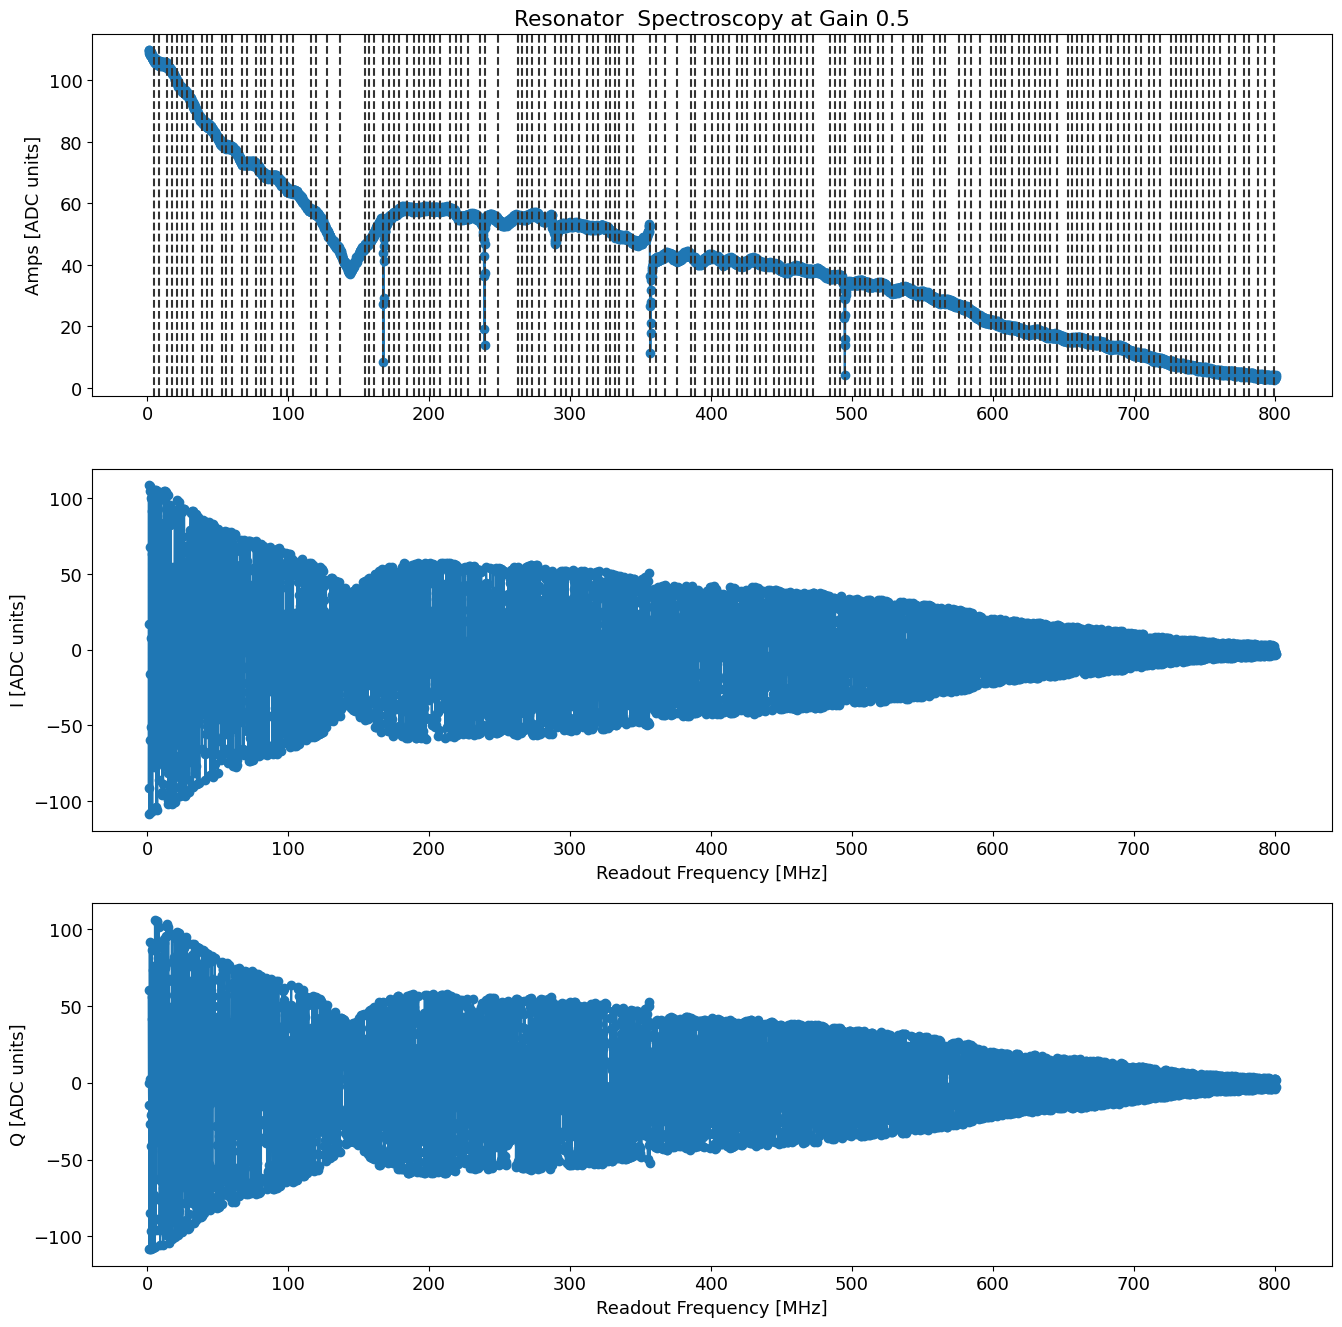

In [48]:
#rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=6000, span=800, reps=2000, npts=5000)
rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=1, span=800, reps=2000, npts=5000)
rspec.go(analyze=False, display=False, progress=True, save=True)

rspec.analyze(fit=False, coarse_scan = True)
rspec.display(fit=False, coarse_scan = True)
res_values = rspec.data['coarse_peaks']

In [ ]:
# Optional, play around with the finding peaks: 
rspec.analyze(fit=False, coarse_scan = True)
rspec.display(fit=False, coarse_scan = True)
res_values = rspec.data['coarse_peaks']

### Fine

In [134]:
# Fine, going through list of res values 
#for i in range(len(res_values)):
for i in range(1):
    if i<num_qubits: qubit_i=i
    else: qubit_i=0
    # Next, run the fine scan for each to make sure they are good. 
    rspec = cfg.make_rspec_fine(soc, expt_path, cfg_path, qubit_i, im=im, center=res_values[i])
    rspec.go(analyze=True, display=True, progress=True, save=True)
    if i<num_qubits:
        auto_cfg = config.update_readout(cfg_file, 'frequency', round(float(rspec.data['fit'][0]),4), i)
        auto_cfg = config.update_readout(cfg_file, 'kappa', round(float(rspec.data['kappa']),4), i)

NameError: name 'res_values' is not defined

  0%|          | 0/200 [00:00<?, ?it/s]

[494.79824051205634, 50000, 10000, 0, 0.284946817877061, 0.7120639008051769, 0.020515257258656355]
[ 4.94796453e+02  9.17193230e+04  2.16345870e+05 -1.20425523e-01
  1.86345411e-01  6.57767349e-01  9.76383264e-03]

Freq with minimum transmission: 494.79593419291655
Freq with maximum transmission: 494.91758365420526
From fit:
	f0: 494.7964527504293
	Qi: 91719.32297813897
	Qe: 216345.8701174103
	Q0: 64412.00492952392
	kappa [MHz]: 0.007681742763508268
	phi [radians]: -0.12042552254554074
Saving C:\_Data\Coherence\Tuning_2024_06_18\00009_resonator_spectroscopy_res3.h5


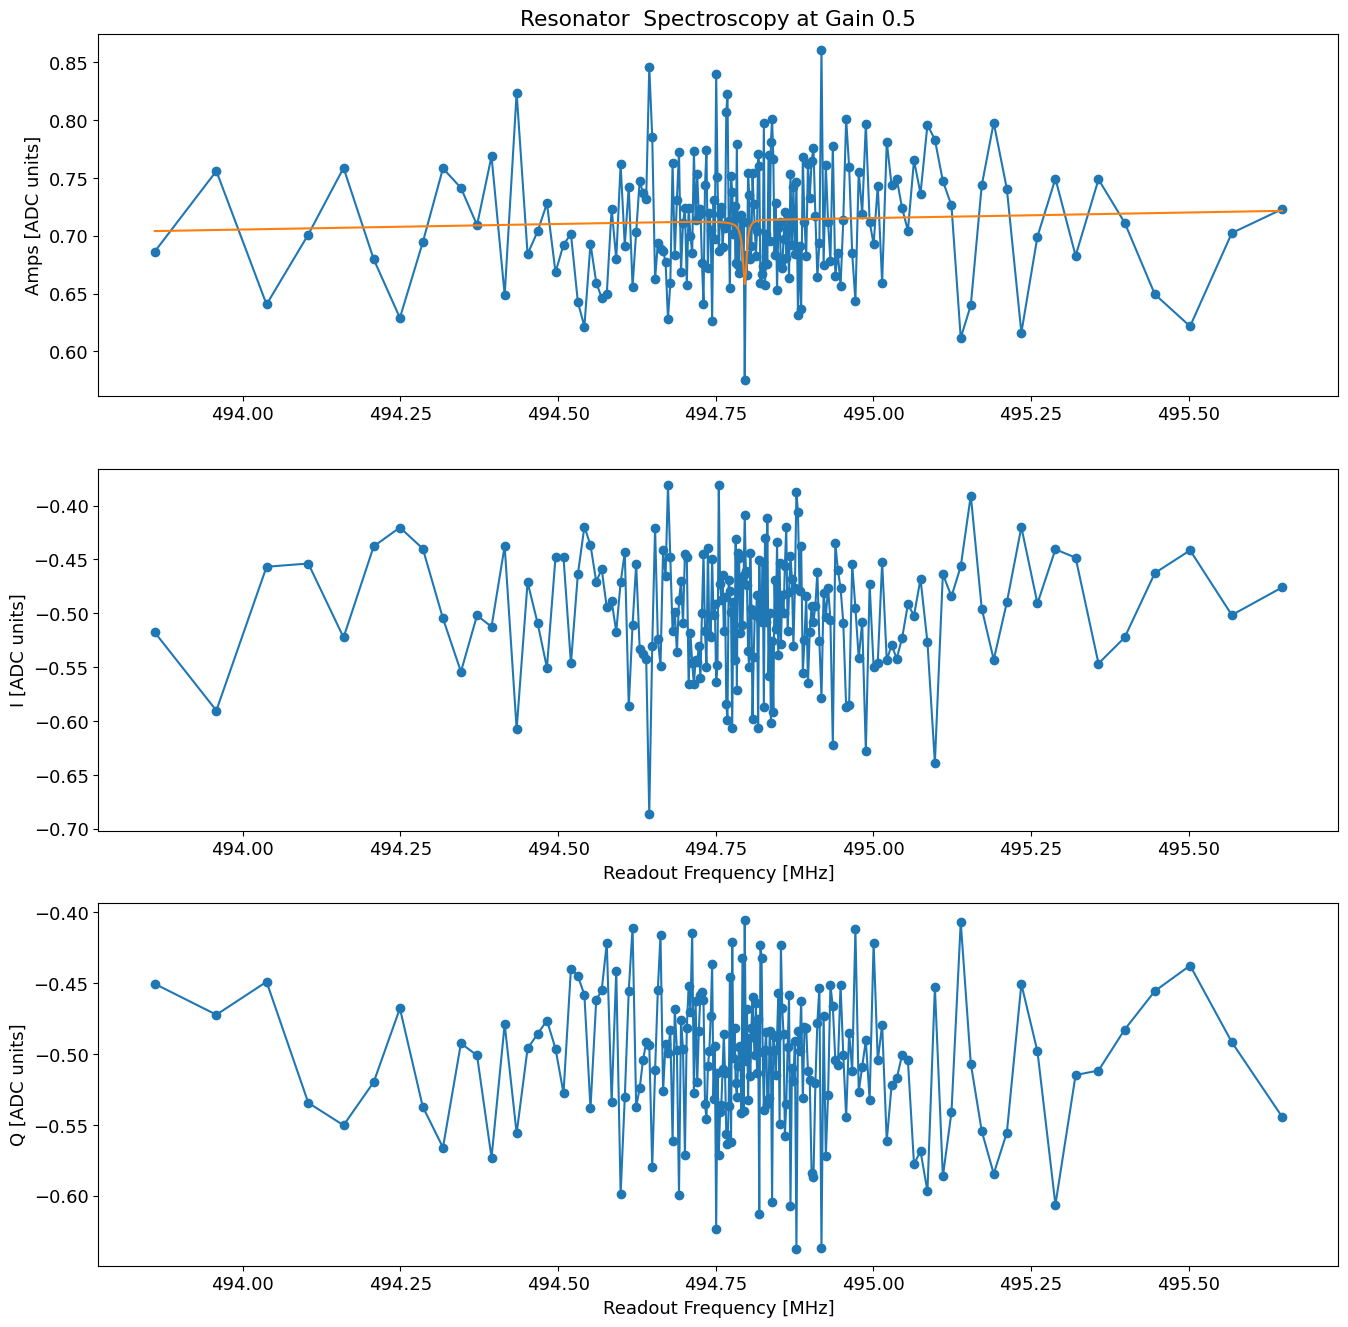

In [79]:
# Just run one qubit 
i = 3
#config.update_readout(cfg_file, 'gain', 4000, i)

rspec = cfg.make_rspec_fine(soc, expt_path, cfg_path, i, im=im, reps=5000, span=15,npts=1000, smart=False)
#auto_cfg = config.update_readout(cfg_file, 'frequency', round(float(rspec.data['fit'][0]),4), i)
#auto_cfg = config.update_readout(cfg_file, 'kappa', round(float(2*rspec.data['kappa']),4), i)

If you are okay with the peaks, save data to <code>auto_cfg.device.readout.frequency</code>

### Resonator Power Spectroscopy 

Find a good value for gain to park your readout at until you run readout optimization. From the 2D sweep that is produced, choose a value for gain that is right before the resonator 'breaks' (goes from e -> f). Want to choose a high value for gain because we want to be in the shot noise limited regime which increases our signal:noise ratio. The gain value should be saved in <code>auto_cfg.device.readout.gain</code>

  0%|          | 0/21 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00000_ResonatorPowerSweepSpectroscopyExperiment_qubit3.h5


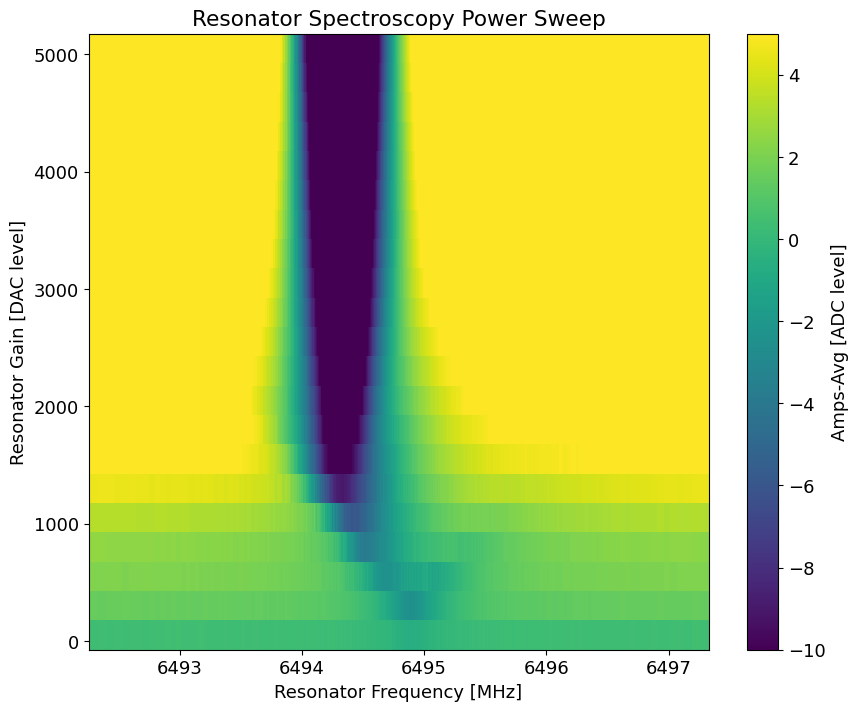

In [88]:
i=3
rpowspec=cfg.make_rpowspec(soc, expt_path, cfg_path, i, auto_cfg['device']['readout']['frequency'][i], npts_f=500, npts_gain=20, start_gain=50, span_gain=5000, smart=True, reps=2000)
rpowspec.go(analyze=False, display=False, progress=True, save=True)

# Testing 
rpowspec.analyze(fit=False, lowgain=None, highgain=None)
rpowspec.display(fit=False)

In [ ]:
# assign the resonator gain to the results config file
gain_values = [12000, 4000, 8000, 6000, 8750, 8000]
for i in range(num_qubits):
    auto_cfg = config.update_readout(cfg_file, 'gain', int(gain_values[i]), i)

## Qubit Spectroscopy

### Coarse

High power and wide

Running qubit spectroscopy for qubit 0


  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00006_qubit_spectroscopy_coarse_qubit0.h5
Found peak in amps at [MHz] 3288.0791
Found peak in amps at [MHz] 3319.5457666666666
Found peak in amps at [MHz] 3348.8791
Found peak in amps at [MHz] 3398.4791
Found peak in amps at [MHz] 3427.2791
Found peak in amps at [MHz] 3473.6791
Found peak in amps at [MHz] 3502.4791
Found peak in amps at [MHz] 3565.4124333333334
Found peak in amps at [MHz] 3618.745766666667
Found peak in amps at [MHz] 3652.345766666667
Found peak in amps at [MHz] 3683.2791
Found peak in amps at [MHz] 3712.6124333333332
Found peak in amps at [MHz] 3739.8124333333335
Found peak in amps at [MHz] 3793.6791000000003
Found peak in amps at [MHz] 3825.1457666666665
Found peak in amps at [MHz] 3876.8791
Found peak in amps at [MHz] 3926.4791
Found peak in amps at [MHz] 3972.345766666667
Found peak in amps at [MHz] 4008.0791
Found peak in amps at [MHz] 4038.4791


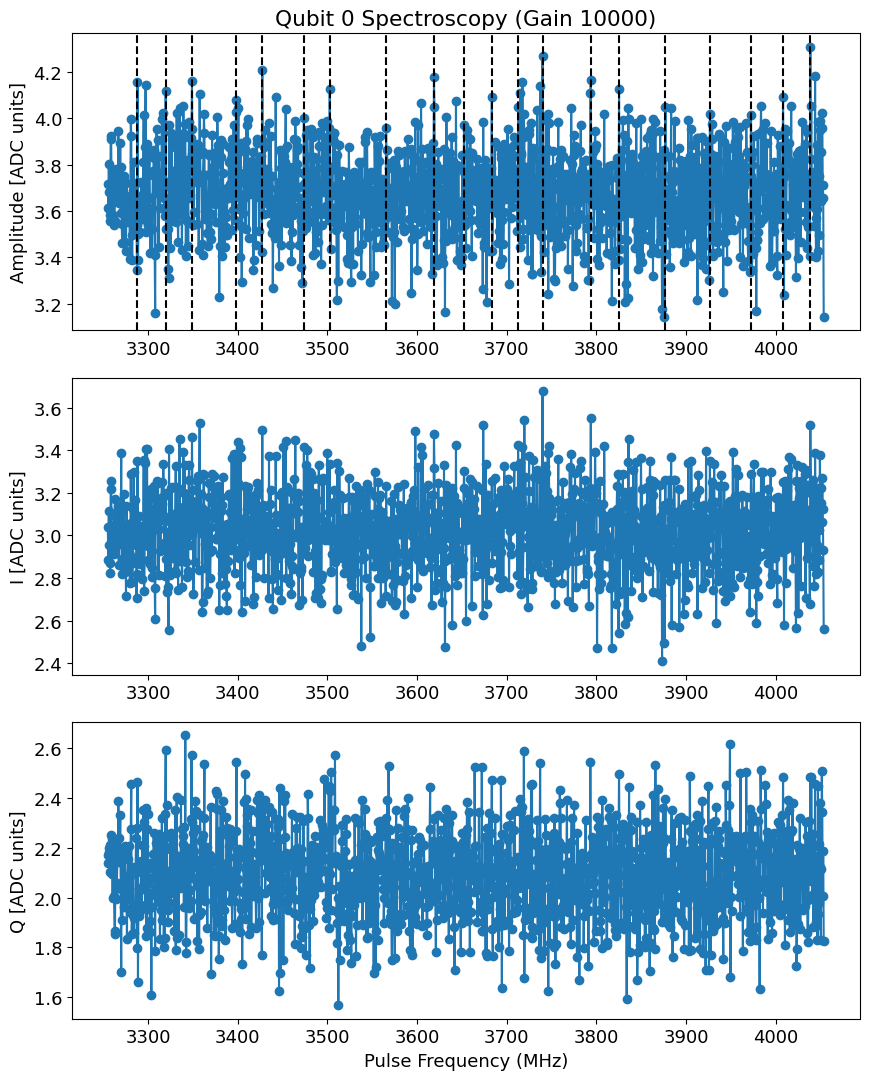

In [34]:
# You may want to update this frequency, which will be the center of the scan. 
#auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(3300), i)
i=0
print('Running qubit spectroscopy for qubit', i)
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, coarse=True)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

In [ ]:
qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

#### Updating frequencies 

In [ ]:
# Here, choose which peak you want to save the value for, adjust index accordingly

auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["coarse_peaks_x"][0]), i)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(qspec.data["coarse_peaks_x"][1]), i)

In [ ]:
3083.359906874908
auto_cfg = config.update_qubit(cfg_file, 'f_ge', float(3084.32), i)

### Medium 
(choose your own gain, span)

  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00004_qubit_spectroscopy_coarse_qubit0.h5
Found peak in amps at [MHz] 3642.0291
Found peak in amps at [MHz] 3643.3624333333332
Found peak in amps at [MHz] 3644.5457666666666
Found peak in amps at [MHz] 3645.745766666667
Found peak in amps at [MHz] 3646.8624333333332
Found peak in amps at [MHz] 3647.7957666666666
Found peak in amps at [MHz] 3649.3124333333335
Found peak in amps at [MHz] 3650.5457666666666
Found peak in amps at [MHz] 3651.5124333333333
Found peak in amps at [MHz] 3652.8291
Found peak in amps at [MHz] 3653.712433333333
Found peak in amps at [MHz] 3655.0624333333335
Found peak in amps at [MHz] 3656.7291
Found peak in amps at [MHz] 3658.6291
Found peak in amps at [MHz] 3659.5124333333333
Found peak in amps at [MHz] 3660.5624333333335
Found peak in amps at [MHz] 3661.4291
Found peak in amps at [MHz] 3662.6624333333334
Found peak in amps at [MHz] 3663.5291
Found peak in amps at [MHz] 3664.5124333333333
Found peak in amps at [MHz] 36

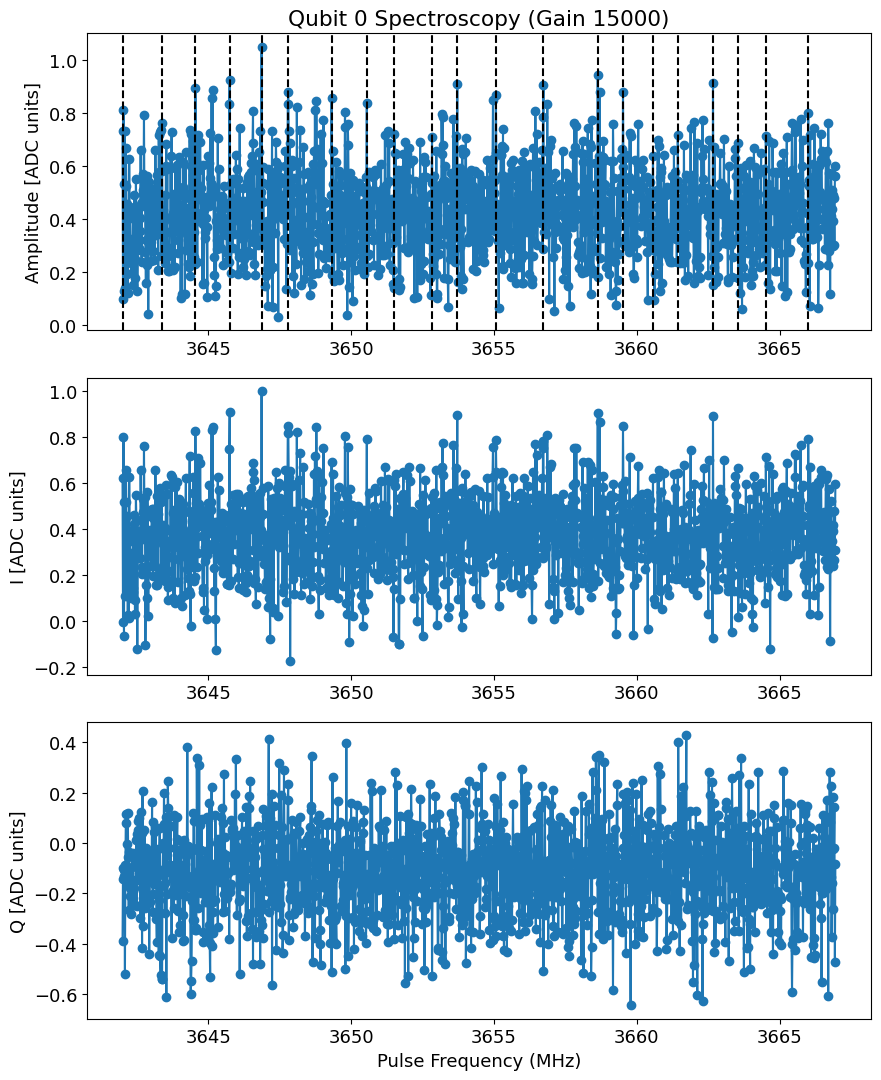

In [32]:
qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, coarse=True,span=25, gain=15000, reps=50)
qspec.go(analyze=False, display=False, progress=True, save=True)

qspec.analyze(fit=False, coarse=True)
qspec.display(fit=False, coarse=True)

### Fine

  0%|          | 0/100 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00004_qubit_spectroscopy_fine_qubit0.h5
Found peak in amps at [MHz] 3652.6567804350666, HWHM 0.010920406492124416
Found peak in I at [MHz] 3651.842580310024, HWHM 0.1444908533777771
Found peak in Q at [MHz] 3653.349272629179, HWHM 0.0021193834179840183


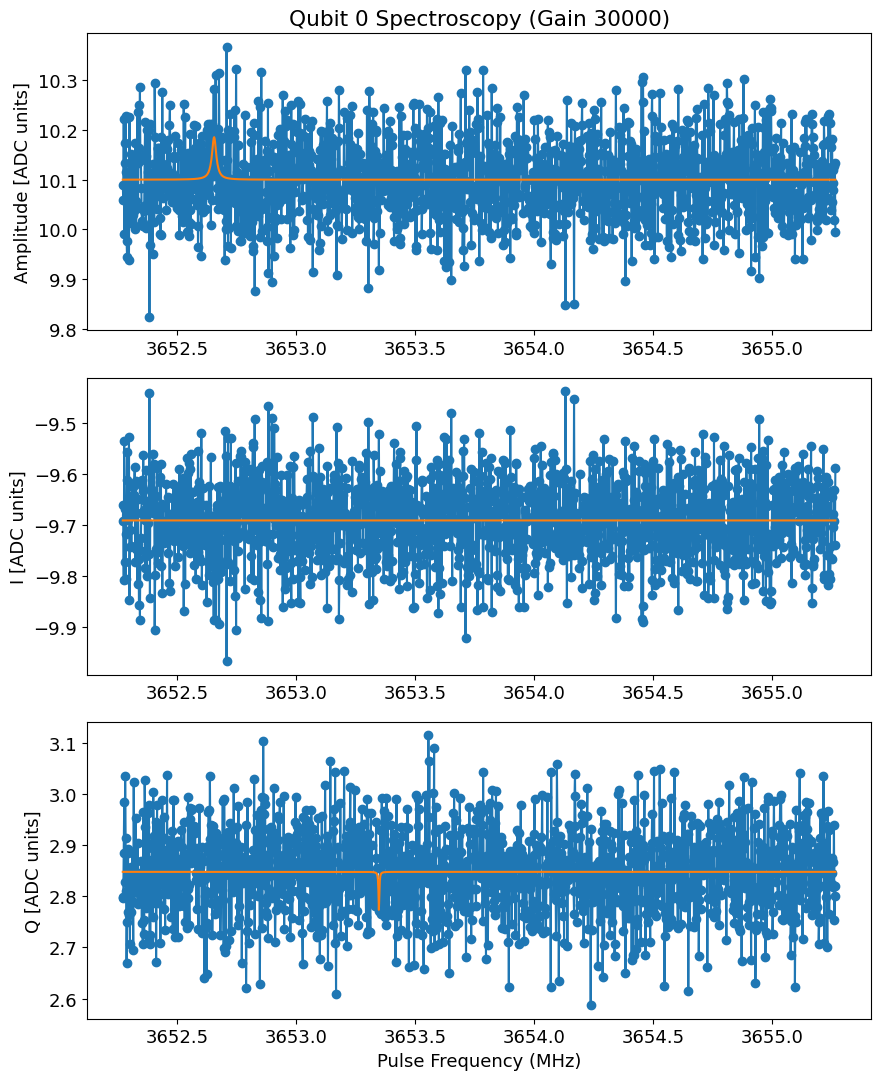

In [76]:
# Fine 
for i in range(1):
    qspec = cfg.make_qspec(soc, expt_path, cfg_path, i, im=im, gain=30000, rounds=100)
    qspec.go(analyze=False, display=False, progress=True, save=True)

    qspec.analyze(fit=True, signs = [1,-1,-1])
    qspec.display(fit=True, signs= [1, -1, -1])

    #auto_cfg = config.update_qubit(cfg_file, 'f_ge', round(float(qspec.data["fit_amps"][2]),4), i)
    #auto_cfg = config.update_qubit(cfg_file, 'kappa', round(float(2*qspec.data["fit_amps"][3]),4), i)


### EF Spectroscopy

#### Coarse

  0%|          | 0/3 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_qubit_EF_spectroscopy_qubit1.h5
Found peak in amps at [MHz] 3332.82647447507, HWHM -6.273843748985136
Found peak in I at [MHz] 3333.5026767997206, HWHM 5.550910127291285
Found peak in Q at [MHz] 3330.0151888070604, HWHM 6.729114858921813


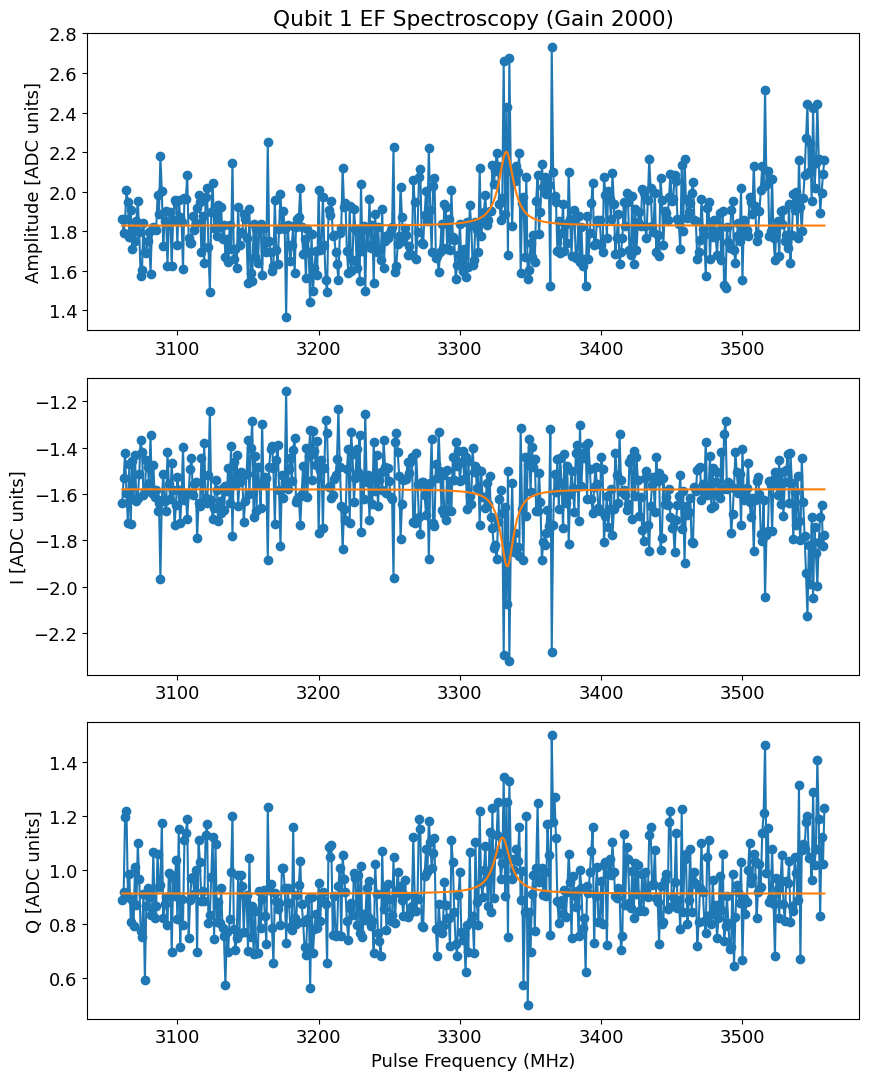

In [199]:
i=1
qspec = cfg.make_qspec_ef(soc, expt_path, cfg_path, i, im=im, go=False, coarse=True, gain=2000)
qspec.go(analyze=False, display=False, progress=True, save=True)
qspec.analyze()
qspec.display()

#### Fine

  0%|          | 0/3 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00003_qubit_EF_spectroscopy_qubit1.h5
Found peak in amps at [MHz] 3332.941547849627, HWHM 0.3855798676985099
Found peak in I at [MHz] 3332.9409473506234, HWHM 0.38888070660557256
Found peak in Q at [MHz] 3332.943876809862, HWHM 0.38074043547478553


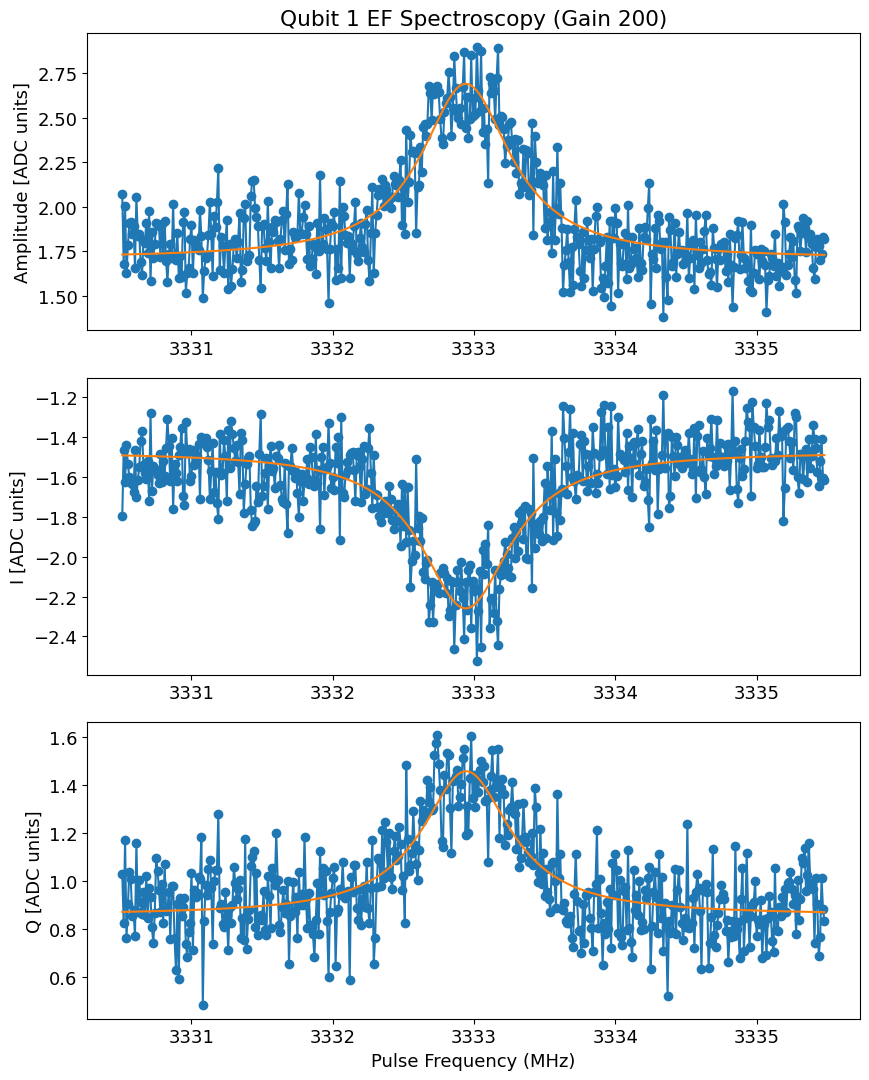

In [200]:
# EF spectroscopy fine 
qspec = cfg.make_qspec_ef(soc, expt_path, cfg_path, i,go=True, im=im)

In [201]:
auto_cfg = config.update_qubit(cfg_file, 'f_ef', round(float(qspec.data["fit_amps"][2]),4), i)

*Set cfg qubit 1 f_ef to 3332.9415 from 3333*


#### Medium

  0%|          | 0/3 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_qubit_EF_spectroscopy_qubit3.h5
Found peak in amps at [MHz] 3582.4681800939084, HWHM 0.27846391990332625
Found peak in I at [MHz] 3569.9520434335136, HWHM 7.181909101141762
Found peak in Q at [MHz] 3570.2419625326547, HWHM 2.3075854462845804


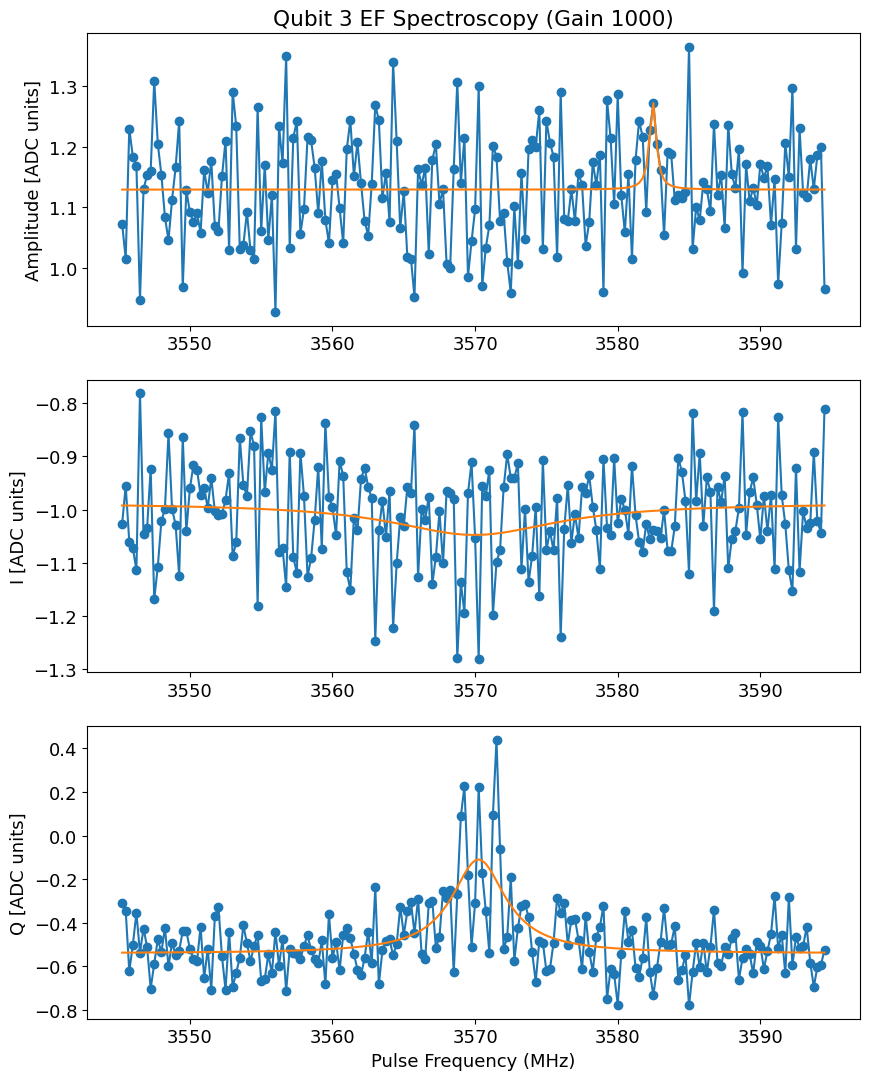

  0%|          | 0/3 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_qubit_EF_spectroscopy_qubit3.h5


ValueError: Unable to create dataset (name already exists)

In [191]:
#qspec = cfg.make_qspec_ef(soc, expt_path, cfg_path, i, im=im, go=False, coarse=True, span=100, gain=5000, npts=200)
qspec = cfg.make_qspec_ef(soc, expt_path, cfg_path, i, im=im, go=True, coarse=True, gain=1000, npts=200, span=50)
#qspec = cfg.make_qspec_ef(soc, expt_path, cfg_path, i, im=im, go=False, coarse=False, gain=300)

qspec.go(analyze=False, display=False, progress=True, save=True)
qspec.analyze(fit=True, coarse=False)
qspec.display(fit=True, coarse=False)

In [ ]:

#auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(qspec.data["fit_amps"][2]), i)
auto_cfg = config.update_qubit(cfg_file, 'f_ef', float(2882.25), i)

In [272]:
i=1

## Coherent scans

### Rabi

In [28]:
# We don't need this for initial tuning 
lengthrabi = cfg.make_lengthrabi(soc, expt_path, cfg_path, i, im=im, gain=15000)
lengthrabi.go(analyze=True, display=True, progress=True, save=True)

auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','sigma'), float(lengthrabi.data['pi_length']), i)

TypeError: LengthRabiExperiment.__init__() got an unexpected keyword argument 'im'

#### Amplitude

gauss


  0%|          | 0/20 [00:00<?, ?it/s]

Attempted to init fitparam 1 to 0.0013131313131313131, which is out of bounds 3.4013605442176872e-06 to 0.0003401360544217687. Instead init to 0.00017176870748299318
Attempted to init fitparam 1 to 0.00037037037037037035, which is out of bounds 3.4013605442176872e-06 to 0.0003401360544217687. Instead init to 0.00017176870748299318
Saving C:\_Data\Coherence\Tuning_2024_06_18\00014_amp_rabi_qubit0.h5


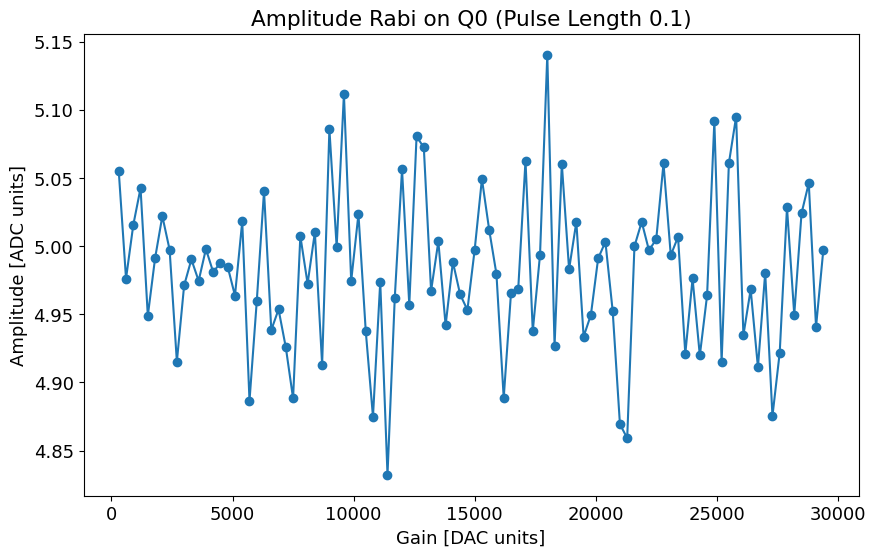

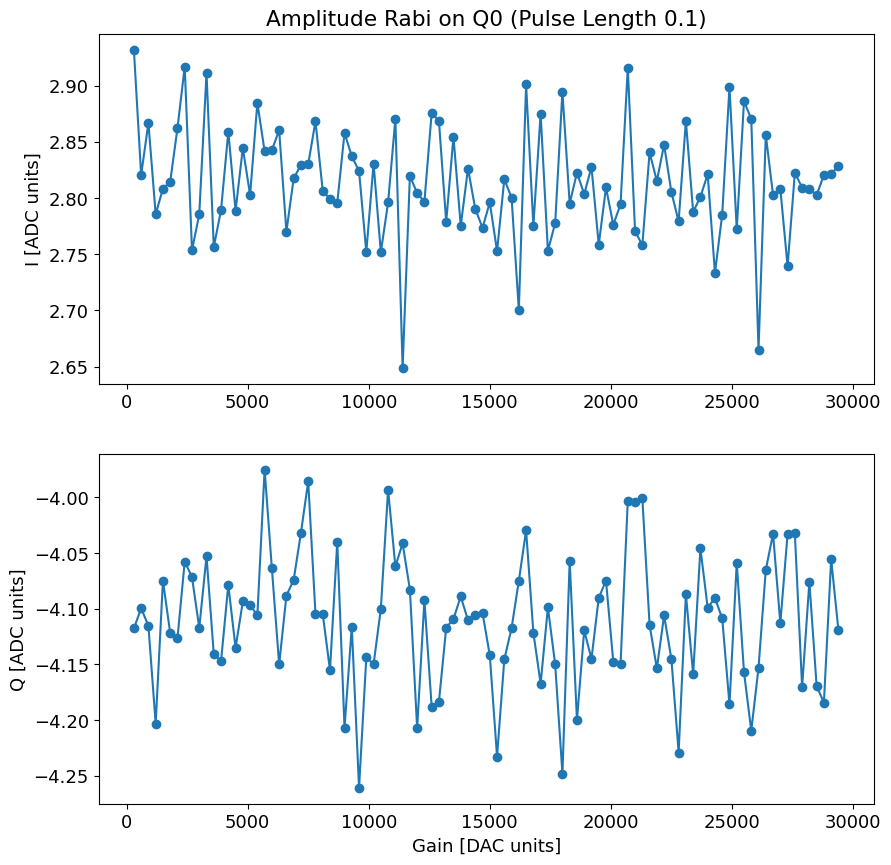

In [69]:
i=0
amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, go=True, im=im, rounds=20)
#auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','gain'), int(amp_rabi.data['pi_length']), i)


In [66]:
amp_rabi.go(analyze=False, display=True, progress=True, save=True, rounds=10)

TypeError: Experiment.go() got an unexpected keyword argument 'rounds'

#### Chevron

In [ ]:
amp_chevron = cfg.make_amprabi_chevron(soc, expt_path, cfg_path, i, sigma=0.4, span_f=8)
amp_chevron.go(analyze=True, display=True, progress=True, save=True)

### Ramsey

  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00008_ramsey_qubit0.h5
Current pi pulse frequency: 3653.7711
Fit frequency from amps [MHz]: 0.6603490422964677 +/- 0.0010901164051133156
T2 Ramsey from fit amps [us]: 24.436000000000003
Current pi pulse frequency: 3653.7711
Fit frequency from I [MHz]: 0.6556110416222145 +/- 0.0011973356734855947
T2 Ramsey from fit I [us]: 24.436000000000003
Fit frequency from Q [MHz]: 0.9890447574367895 +/- 0.0009977823638063921
T2 Ramsey from fit Q [us]: 24.436000000000003
Suggested new pi pulse frequency from fit 3653.2155:



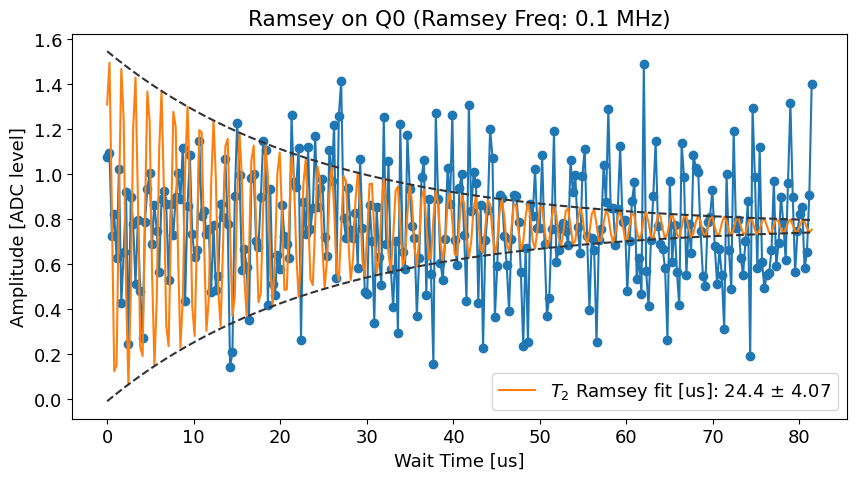

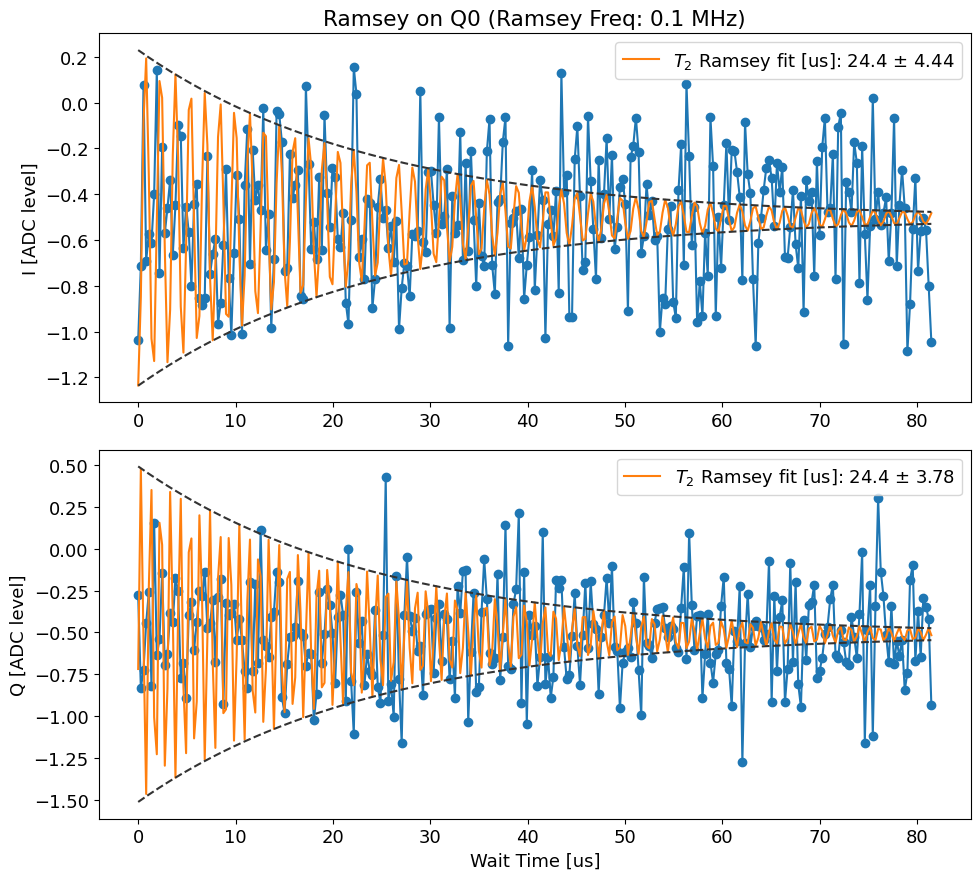

*Set cfg qubit 0 f_ge to 3653.2155 from 3653.7711*
*Set cfg qubit 0 T2r to 24.44 from 41.0*


In [148]:
t2r=cfg.make_t2r(soc, expt_path, cfg_path, i, go=True, im=im)
auto_cfg = config.update_qubit(cfg_file, 'f_ge', round(float(t2r.data['new_freq']),4), i)
auto_cfg = config.update_qubit(cfg_file, 'T2r', round(float(t2r.data['fit_avgi'][3]),2), i)

### T1

  0%|          | 0/100000 [00:00<?, ?it/s]

t1_amps error:fit ratio= 0.044390025837663806
t1_i error:fit ratio= 0.03256297222333734
t1_q error:fit ratio= 2.504994075851961
t1_i is better, saving T1_i to results cfg file
Saving C:\_Data\Coherence\Tuning_2024_06_18\00013_t1_qubit0.h5
Fit T1 amps [us]: 20.78922761002034
Fit T1 avgi [us]: 17.126170697452054
Fit T1 avgq [us]: 16.385868196249987


c:\_Lib\python\slab_rfsoc_expts\experiments\fitting.py:64: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


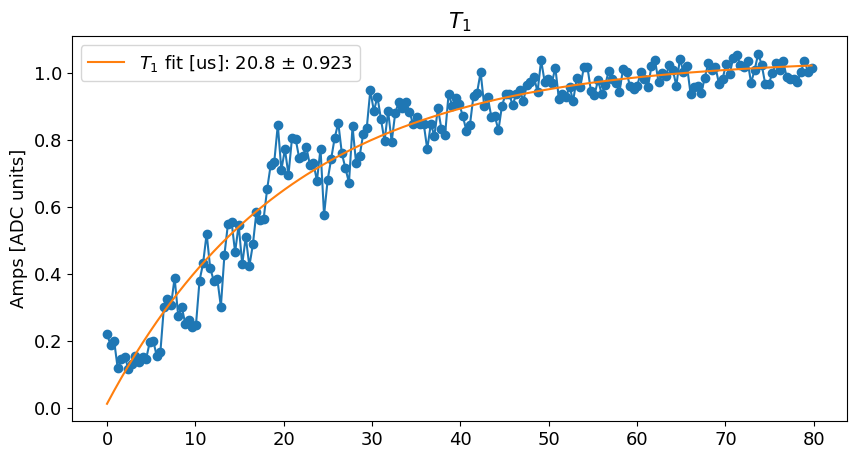

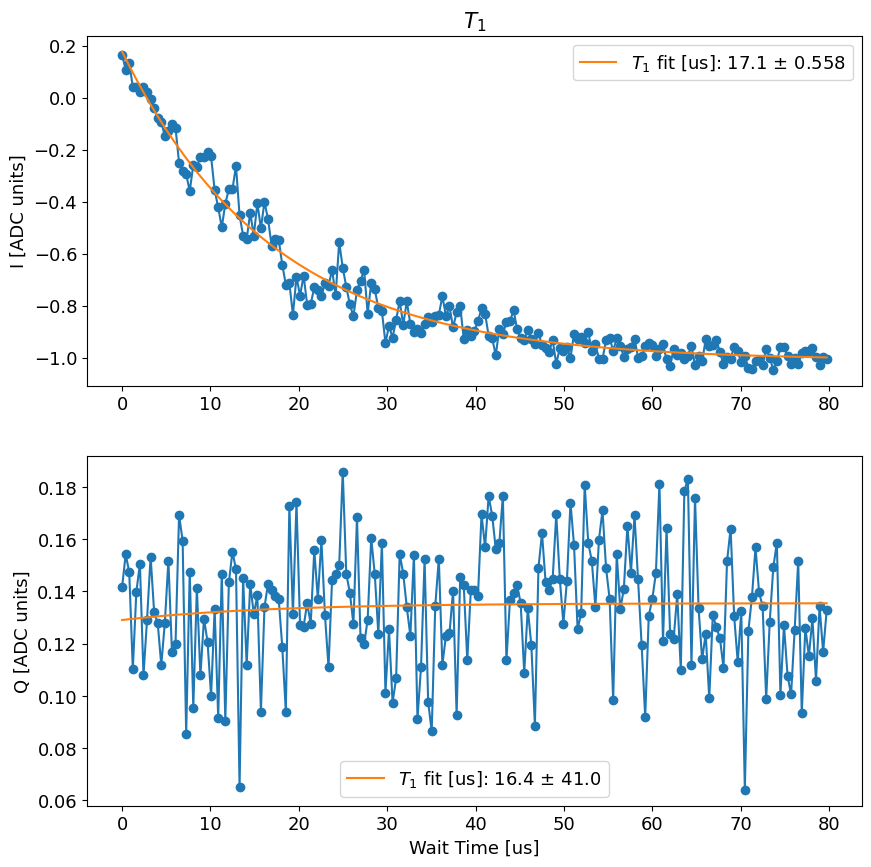

*Set cfg qubit 0 T1 to 17.13 from 26.85*


In [24]:
t1 = cfg.make_t1(soc, expt_path, cfg_path, i, go=True, im=im) 
auto_cfg = config.update_qubit(cfg_file, 'T1', round(float(t1.data['new_t1']),2), i)

### Single Shot

<Pyro4.core.Proxy at 0x1ec4ba9d480; connected IPv4; for PYRO:obj_c04bf73ecb1d4eb2b59ad71361cbb6f8@192.168.137.233:35387>


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00041_single_shot_qubit0.h5
Unrotated:
Ig -1.161430119176598 +/- 0.4721933240010656 	 Qg -0.17984832069339113 +/- 0.4632635484146161 	 Amp g 1.1752724535982282
Ie 0.13217768147345613 +/- 0.5982157937418308 	 Qe 0.15492957746478872 +/- 0.48653474602076174 	 Amp e 0.20365194193308442
hi
Rotated:
Ig -1.166397847597313 +/- 0.4721933240010656 	 Qg 0.11659445674580737 +/- 0.4632635484146161 	 Amp g 1.1722108198713634
Ie 0.1716205573696975 +/- 0.5982157937418308 	 Qe 0.13039578284577447 +/- 0.48653474602076174 	 Amp e 0.21553810775788118


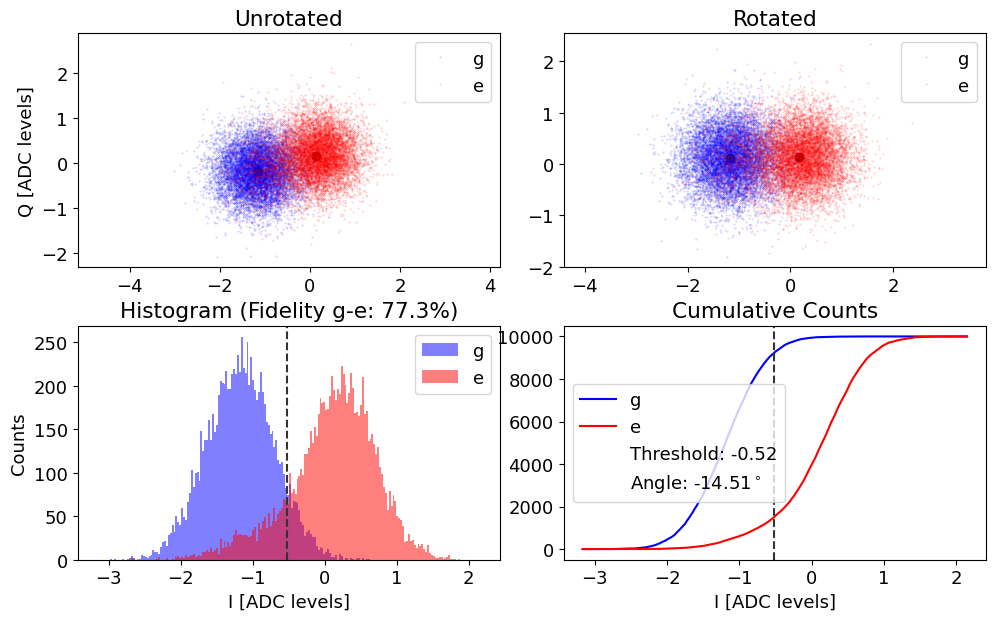

ge fidelity (%): 77.30386519325965
rotation angle (deg): -14.509472183582782
threshold ge: -0.5240839332536216
*Set cfg resonator 0 phase to -14.509 from -29.574*
*Set cfg resonator 0 threshold to -0.5241 from -0.9468*
*Set cfg resonator 0 fidelity to 0.773 from 0.9328*


In [29]:
# Single shot 
#config.update_readout(cfg_file, 'gain', 800, i)
#config.update_readout(cfg_file, 'readout_length',5.4,i)
i=0
shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, im=im, go=True)
config.update_readout(cfg_file, 'phase', round(float(shot.data['angle']),3), i);
config.update_readout(cfg_file, 'threshold', round(float(shot.data['thresholds'][0]),4), i);
config.update_readout(cfg_file, 'fidelity', round(float(shot.data['fids'][0]),4), i);

<Pyro4.core.Proxy at 0x2abab6dc0d0; connected IPv4; for PYRO:obj_3a63e8b1017e43cfa50282e99cb22b2d@192.168.137.233:34767>


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00009_single_shot_qubit2.h5
Unrotated:
Ig -0.49235274975593885 +/- 0.24232247536907728 	 Qg -2.7585421412300684 +/- 0.265024712048517 	 Amp g 2.802135966568076
Ie 0.16189391474129516 +/- 0.38749926270950213 	 Qe -2.5951838594207617 +/- 0.27293467902966395 	 Amp e 2.6002286252997644
If 0.19720143182557762 +/- 0.43151091731254043 	 Qf -2.565245688252522 +/- 0.3812591028590356 	 Amp f 2.5728143823082563
hi
Rotated:
Ig -1.2185243709583 +/- 0.24232247536907728 	 Qg -2.5229232620933275 +/- 0.265024712048517 	 Amp g 2.801775049683853
Ie -0.5365168288648102 +/- 0.38749926270950213 	 Qe -2.5246279085007703 +/- 0.27293467902966395 	 Amp e 2.5810068547053735
If -0.4985035688670635 +/- 0.43151091731254043 	 Qf -2.504826624633611 +/- 0.3812591028590356 	 Amp f 2.5539503181633365


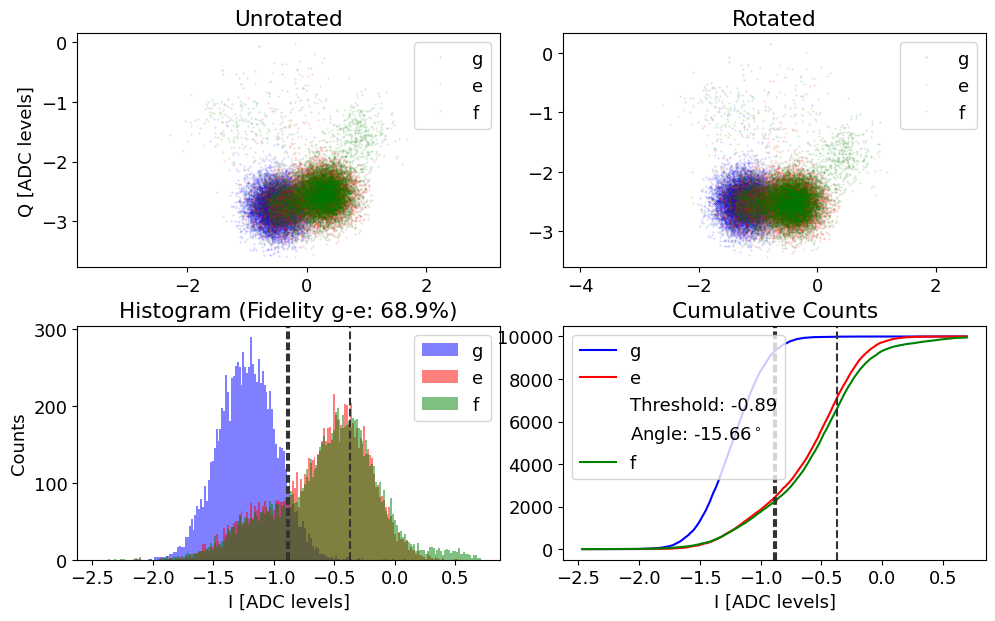

ge fidelity (%): 68.92689268926893
gf fidelity (%): 71.01754385964912
ef fidelity (%): 5.203529175857229
rotation angle (deg): -15.659294891965805
threshold ge: -0.8934038380014193
threshold gf: -0.8775205999115552
threshold ef: -0.3692569810359001


In [56]:
# Check f
shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, im=im, check_f=True, go=True)


In [48]:
i

3

### Randomized benchmarking

In [28]:
rb = cfg.make_rb(soc, expt_path, cfg_path, i, go=True)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

ge fidelity (%): 92.47999999999999
rotation angle (deg): -25.569298034788492
threshold ge: -1.4641778639193532


  0%|          | 0/20 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00000_rb_qubit0.h5


### Echo

  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_echo_qubit0.h5
Current qubit frequency: 3653.7711
Fit frequency from I [MHz]: 0.01995966659054459 +/- 6.827329186898004e-05
T2 Echo from fit I [us]: 167.16
Fit frequency from Q [MHz]: 0.001131922525919808 +/- 0.0006826547793833087
T2 Echo from fit Q [us]: 663.4201107322056


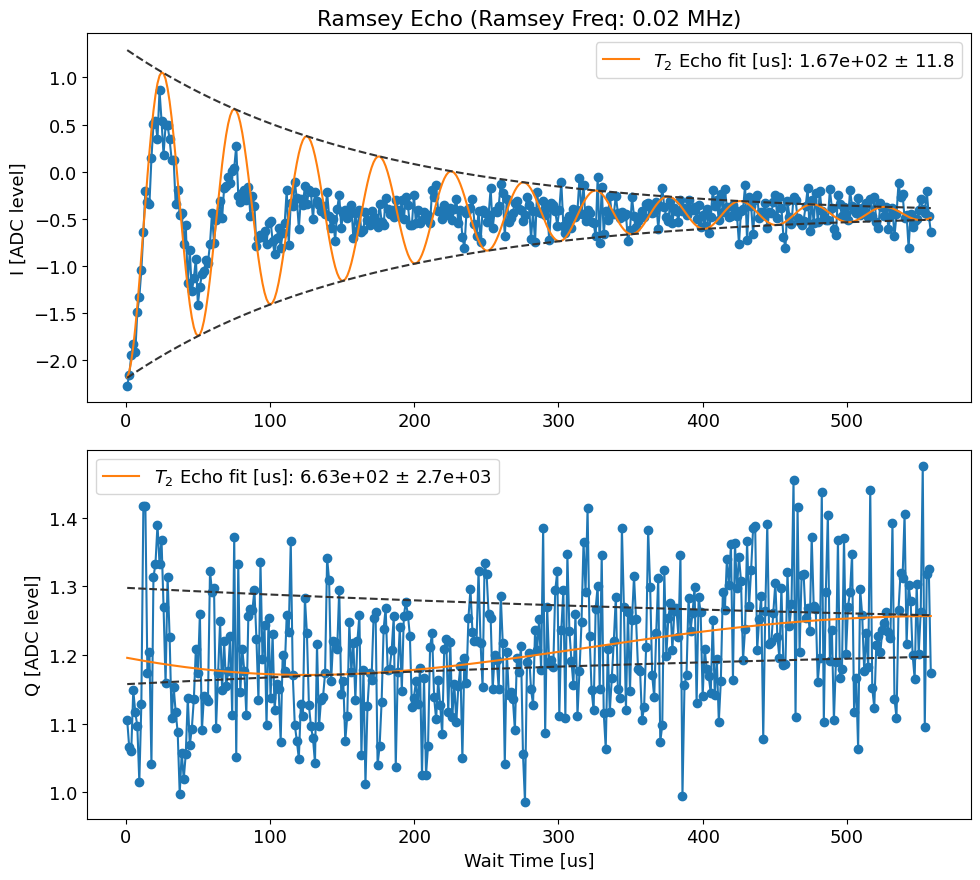

In [26]:
t2e = cfg.make_t2e(soc, expt_path, cfg_path, i, ramsey_freq=0.02, step=1.4, npts=400)
t2e.go(analyze=True, display=True, progress=True, save=True)

### Readout opt 

#### 3D Sweep

In [251]:

shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=20000, npts_f=7, npts_gain=7, npts_len=7)
shotopt.go(analyze=False, display=False, progress=True, save=True)

  0%|          | 0/7 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; not connected; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

<Pyro4.core.Proxy at 0x288cbd07970; connected IPv4; for PYRO:obj_e60367d757f5470591ea3de7a2b63ab5@192.168.137.233:40703>


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_single_shot_opt_qubit0.h5


  0%|          | 0/201 [00:00<?, ?it/s]

[6167.704405602992, 50000, 10000, 0, 5.121410561664165, 5.154497774911549, -0.23688516999006898]
[ 6.16750862e+03  8.81806760e+03  6.07532155e+05  8.06663247e-02
  3.74568400e+02  3.69973600e+00 -3.25944323e-01]

Freq with minimum transmission: 6167.471061973631
Freq with maximum transmission: 6166.576914995047
From fit:
	f0: 6167.50862345434
	Qi: 8818.06760383781
	Qe: 607532.1545893403
	Q0: 8691.90829786861
	kappa [MHz]: 0.709568993608309
	phi [radians]: 0.08066632473880576
Saving C:\_Data\Coherence\Tuning_2024_06_18\00008_resonator_spectroscopy_chi_qubit0.h5


  0%|          | 0/201 [00:00<?, ?it/s]

[6167.704405602992, 50000, 10000, 0, 5.238182943475211, 5.279899787224493, -0.2654032788975308]
[ 6.16746390e+03  9.11176000e+03  6.23775125e+05  1.21449760e-01
  3.86330735e+02  3.49205643e+00 -2.82032855e-01]

Freq with minimum transmission: 6167.490981032955
Freq with maximum transmission: 6166.576914995047
From fit:
	f0: 6167.463901997653
	Qi: 9111.760004920307
	Qe: 623775.1250861795
	Q0: 8980.57673608813
	kappa [MHz]: 0.6867558825274459
	phi [radians]: 0.12144975954333206
Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_resonator_spectroscopy_chi_qubit0_f.h5


  0%|          | 0/201 [00:00<?, ?it/s]

[6167.704405602992, 50000, 10000, 0, 7.281674503486107, 3.5632906453030273, -0.35717382936450354]
[ 6.16765712e+03  4.42650665e+04  8.97956679e+03  9.43696574e-02
  9.96307845e+00  1.76193333e+00 -2.48509074e-01]

Freq with minimum transmission: 6167.685591149016
Freq with maximum transmission: 6166.576914995047
From fit:
	f0: 6167.657116318941
	Qi: 44265.06646980665
	Qe: 8979.566793065575
	Q0: 7465.186566366718
	kappa [MHz]: 0.8261892802661354
	phi [radians]: 0.0943696573644331
Saving C:\_Data\Coherence\Tuning_2024_06_18\00009_resonator_spectroscopy_chi_qubit0.h5


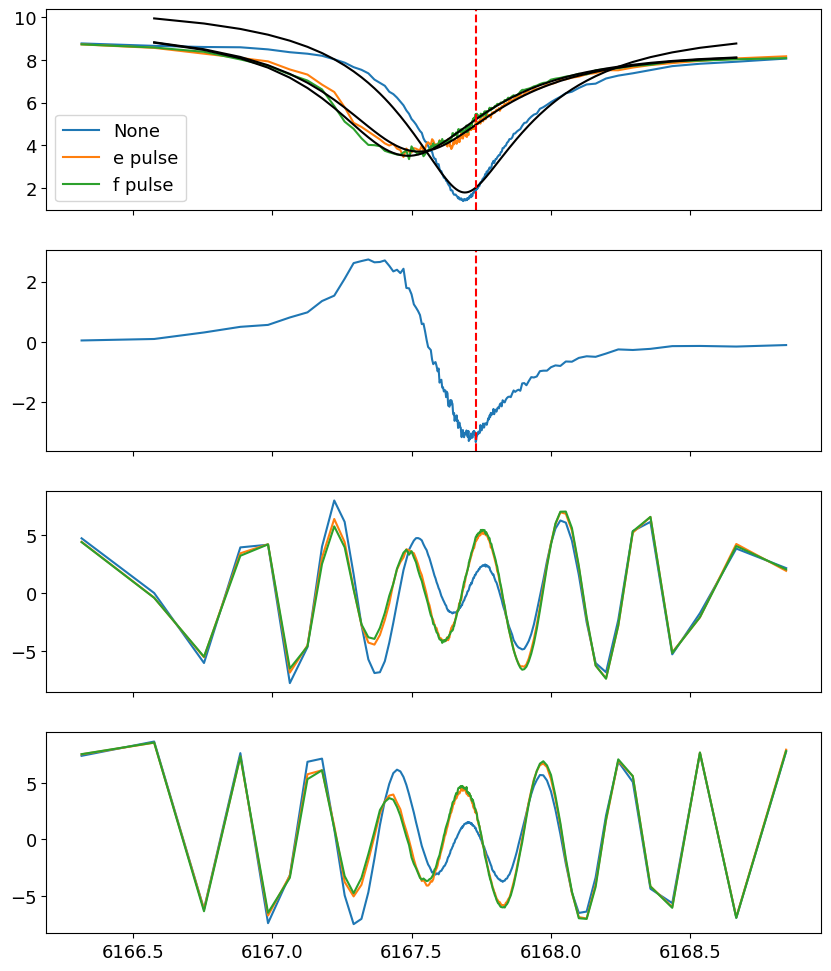

In [306]:
i=0
chi = cfg.check_readout(soc, expt_path, cfg_file, i, im=im, check_f=True)

In [307]:


auto_cfg = config.update_readout(cfg_file, 'chi', round(float(chi.data['chi']),4), i)
auto_cfg = config.update_readout(cfg_file, 'frequency', round(float(chi.data['freq_opt']),4), i)

*Set cfg resonator 0 chi to 0.1485 from 0.1206*
*Set cfg resonator 0 frequency to 6167.7303 from 6167.7101*


#### 2D Sweep

In [102]:
#shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=1, npts_gain=7, npts_len=7, start_gain=6000, span_gain=4500, start_len=12, span_len=25)
#shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=6, span_f=0.7, npts_gain=1, npts_len=5, start_len=12, span_len=25)
shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=1, npts_gain=7, npts_len=7, start_gain=300, span_gain=500, start_len=1, span_len=3, go=True)

#shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=1, npts_gain=7, npts_len=7, go=True, start_gain=540, span_gain=420, start_len=4, span_len=6)

<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372f

(0, 0, 3)
[6239.3648]
[500]
[ 3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]
Max fidelity 35.72428971588636 %
Set params: 
 angle (deg) 128.87462805980027 
 threshold 2.1896368757786946 
 freq [Mhz] 6239.3648 
 Gain [DAC units] 500 
 readout length [us] 9.0


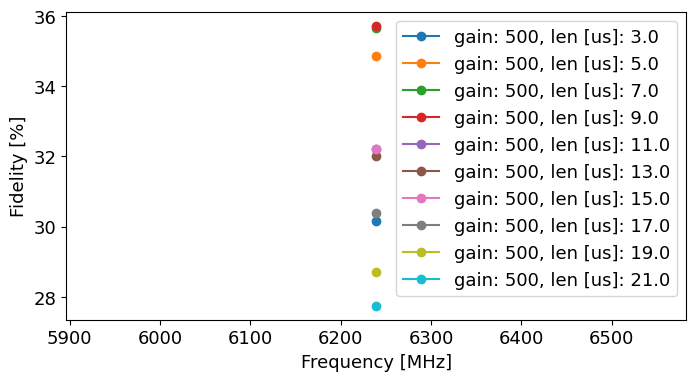

{'fpts': array([6239.3648]),
 'gainpts': array([500]),
 'lenpts': array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 'fid': array([[[0.30171509, 0.34853485, 0.35653565, 0.3572429 , 0.32218055,
          0.319992  , 0.32224501, 0.30392304, 0.28712921, 0.27743002]]]),
 'threshold': array([[[2.31738223, 2.45457468, 2.22957967, 2.18963688, 2.0242169 ,
          2.01136891, 1.87239684, 1.6539163 , 1.83581299, 1.65792923]]]),
 'angle': array([[[-124.09080551, -130.93037919, -130.95417458, -128.87462806,
          -132.71177099, -129.96247249, -133.25530847, -132.38071832,
          -130.68151269, -137.02087514]]]),
 'Ig': [[[array([-1.99566631, -3.60238353, -2.10725894, ..., -1.33152763,
           -2.2524377 , -2.6099675 ]),
    array([-2.39037085, -1.78594665, -6.12166558, ..., -0.11255693,
           -2.48015615, -0.22055953]),
    array([ 0.50999535, -0.0255695 , -0.82008368, ..., -1.81403998,
           -1.24174802,  0.57787076]),
    array([-2.48770788,  0.37346349,  0.2125813

In [138]:
shotopt.analyze()
shotopt.display()
shotopt.data

#### 1D Sweep

In [101]:

shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=12, span_f=0.7, npts_gain=1, npts_len=1)

#Length
#shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=1, npts_gain=1, npts_len=10, start_len=2, span_len=6)
#shotopt=cfg.make_singleshot_opt(soc, expt_path, cfg_path, i, im=im, reps=10000, npts_f=1, npts_gain=10, npts_len=1, start_gain=250, span_gain=250)
shotopt.go(analyze=False, display=False, progress=False, save=True)

shotopt.data

<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372fb0; connected IPv4; for PYRO:obj_6d3d1e7daaea43c3b665bd9a47510ca8@192.168.137.233:38239>
<Pyro4.core.Proxy at 0x2abba372f

{'fpts': array([6167.2212    , 6167.28483636, 6167.34847273, 6167.41210909,
        6167.47574545, 6167.53938182, 6167.60301818, 6167.66665455,
        6167.73029091, 6167.79392727, 6167.85756364, 6167.9212    ]),
 'gainpts': array([500]),
 'lenpts': array([3]),
 'fid': array([[[0.66043302]],
 
        [[0.739937  ]],
 
        [[0.80478048]],
 
        [[0.8459423 ]],
 
        [[0.8660433 ]],
 
        [[0.88064403]],
 
        [[0.87704385]],
 
        [[0.8699435 ]],
 
        [[0.84964248]],
 
        [[0.79973999]],
 
        [[0.73073654]],
 
        [[0.63893195]]]),
 'threshold': array([[[-1.55590076]],
 
        [[-1.77950067]],
 
        [[-1.9922471 ]],
 
        [[-1.93973067]],
 
        [[-1.67872213]],
 
        [[-1.01079666]],
 
        [[-0.35778955]],
 
        [[ 0.44849404]],
 
        [[ 1.11625574]],
 
        [[ 1.55078023]],
 
        [[ 1.77448684]],
 
        [[ 1.83764261]]]),
 'angle': array([[[ 159.03514281]],
 
        [[-121.16771976]],
 
        [[ -45

In [36]:
shotopt.data['fid']

array([[[0.79663983],
        [0.81638164],
        [0.84971243],
        [0.85864293],
        [0.86684334],
        [0.84448445],
        [0.84983994],
        [0.85028263],
        [0.87499375],
        [0.88461538]]])

### EF

#### Rabi

gauss


  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00001_amp_rabi_EF_ge_qubit1.h5
Pi gain from amps data [dac units]: 3983
	Pi/2 gain from amps data [dac units]: 1991
Pi gain from avgi data [dac units]: 3985
	Pi/2 gain from avgi data [dac units]: 1992
Pi gain from avgq data [dac units]: 3853
	Pi/2 gain from avgq data [dac units]: 1926


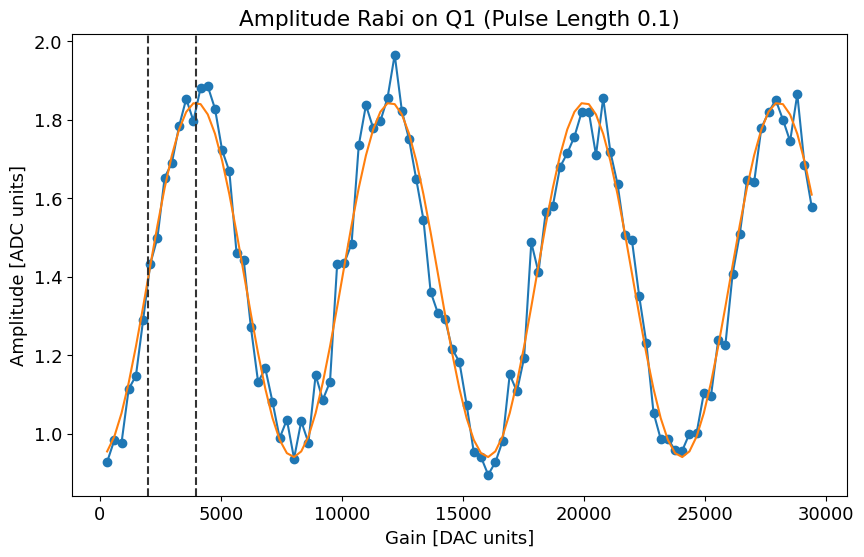

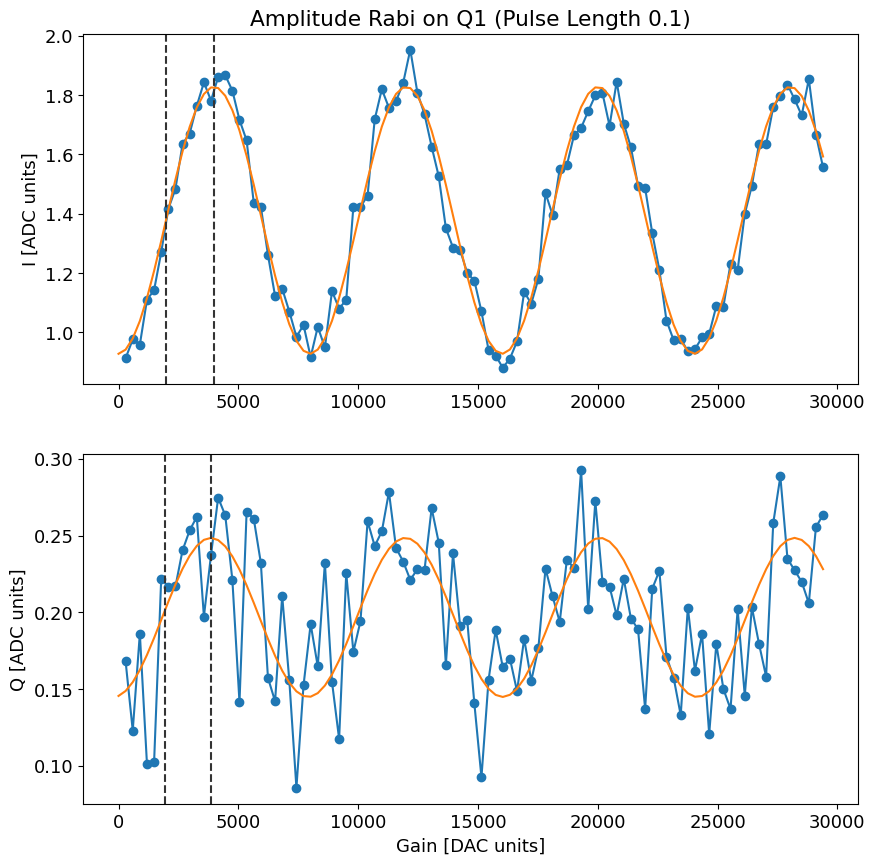

*Set cfg qubit 1 ('pulses', 'pi_ef', 'gain') to 3985 from 4056*


In [274]:
# Rabi EF
#rabi=cfg.make_amprabi(soc, expt_path, cfg_path, i, go=True)
rabief=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, im=im, go=True, pulse_ge=True)
auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ef','gain'), int(rabief.data['pi_length']), i)

#### Qubit Temperature

gauss


  0%|          | 0/2 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00002_amp_rabi_EF_ge_qubit0.h5
Pi gain from amps data [dac units]: 10058
	Pi/2 gain from amps data [dac units]: 5029
Pi gain from avgi data [dac units]: 9311
	Pi/2 gain from avgi data [dac units]: 4655
Pi gain from avgq data [dac units]: 9470
	Pi/2 gain from avgq data [dac units]: 4735


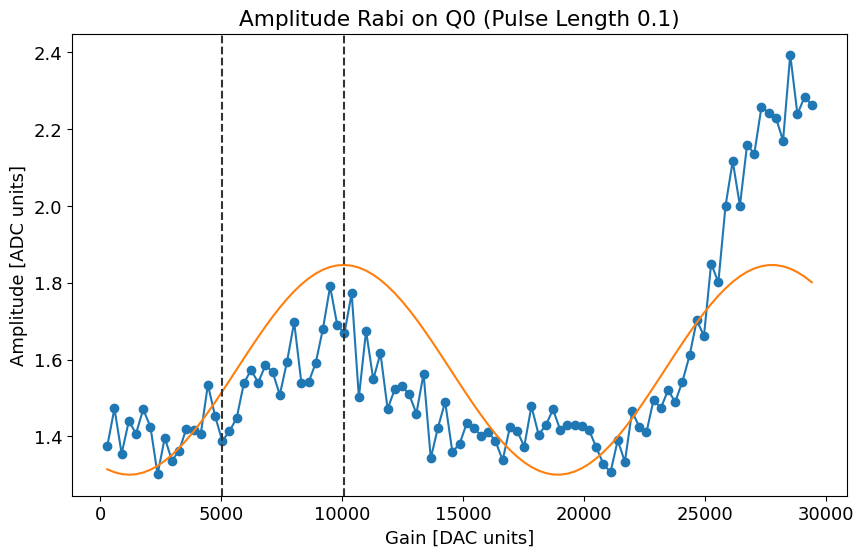

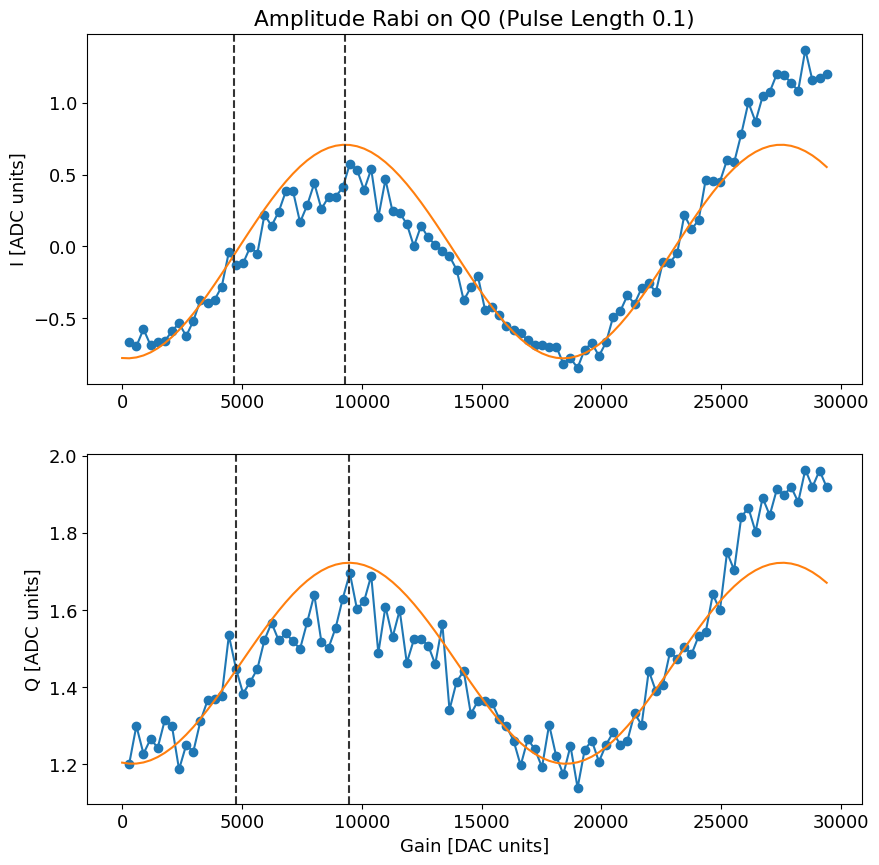

gauss


  0%|          | 0/100 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00000_amp_rabi_EF_qubit0.h5
Pi gain from amps data [dac units]: 8970
	Pi/2 gain from amps data [dac units]: 4485
Pi gain from avgi data [dac units]: 9158
	Pi/2 gain from avgi data [dac units]: 4579
Pi gain from avgq data [dac units]: 8835
	Pi/2 gain from avgq data [dac units]: 4417


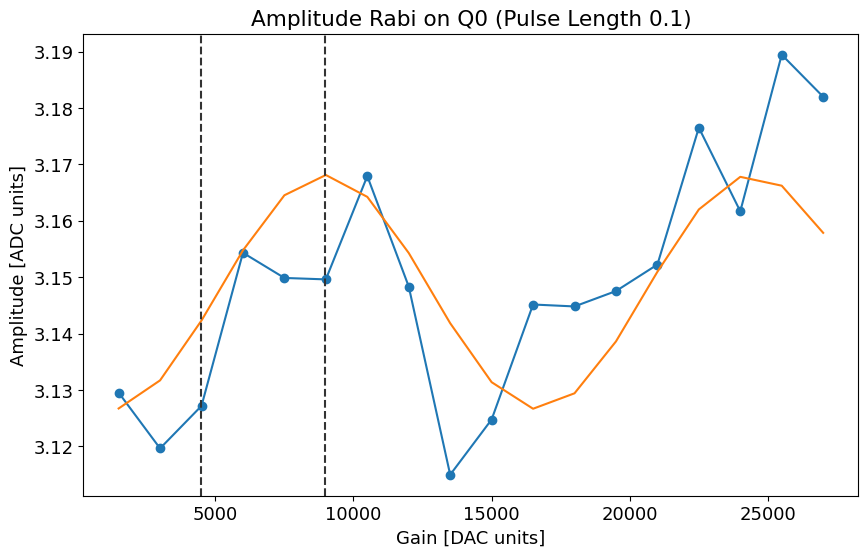

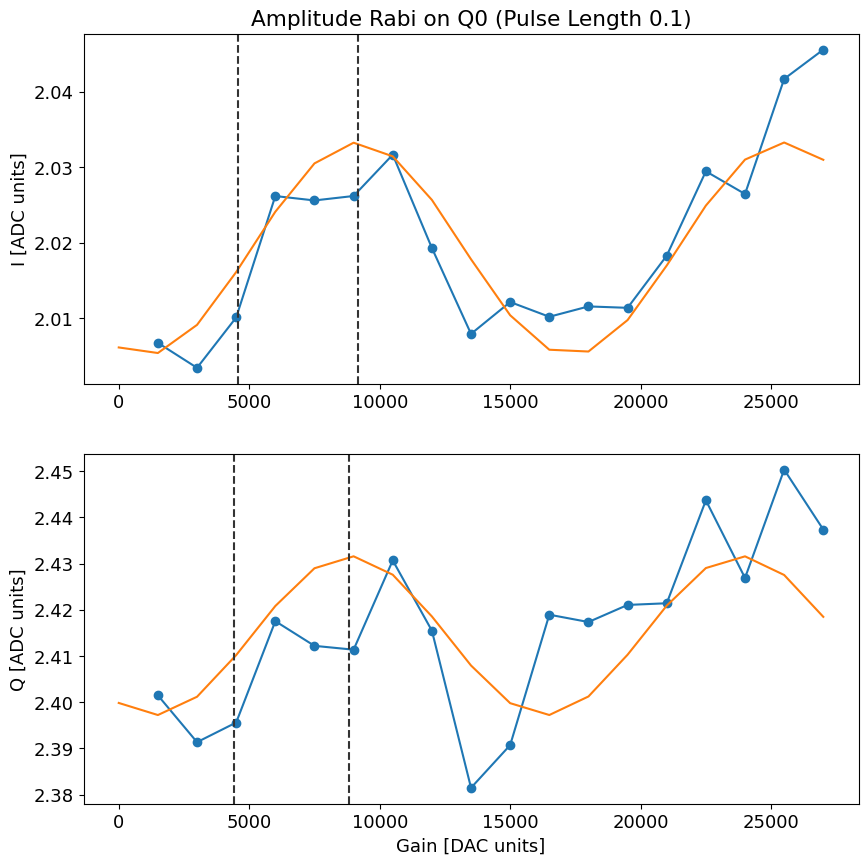

In [245]:
rabief=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, im=im, go=True, pulse_ge=True)
rabief_nopulse=cfg.make_amprabiEF(soc, expt_path, cfg_path, i, im=im, go=True, pulse_ge=False, reps=1000, rounds=100, npts=20)

# To measure temperature, use fewer points to get more signal more quickly 
h = 6.62607015e-34
fge = 1e6*rabief.cfg.device.qubit.f_ge[i]
kB = 1.380649e-23

In [246]:
chan = 'fit_avgi'
print('Qubit temp [mK]:', 1e3*h*fge/(kB*np.log(rabief.data[chan][0]/rabief_nopulse.data[chan][0])))
print('State preparation ratio:', rabief_nopulse.data[chan][0]/rabief.data[chan][0])

Qubit temp [mK]: 44.231129845105364
State preparation ratio: 0.018977738349373652


In [216]:
print(rabief.data['fit_avgq'][0])
print(rabief_nopulse.data['fit_avgq'][0])

0.22335727218834073
0.0020141380572730743


In [ ]:
print(rabief.data['fit_amps'][0])
print(rabief_nopulse.data['fit_amps'][0])

## Other

2


  0%|          | 0/151 [00:00<?, ?it/s]

[6356.596666225165, 50000, 10000, 0, 7.139693723977174, 5.880552888140526, -0.6216036880853245]
[ 6.35685828e+03  1.20927940e+04  4.83378625e+05  7.45185805e-01
  2.50334890e+02  7.76653589e-01 -4.92426284e-02]

Freq with minimum transmission: 6356.954282119205
Freq with maximum transmission: 6356.219182781457
From fit:
	f0: 6356.858276431693
	Qi: 12092.793965263974
	Qe: 483378.6252792481
	Q0: 11797.6494620567
	kappa [MHz]: 0.5388241358481162
	phi [radians]: 0.7451858052850144
Saving C:\_Data\Coherence\Tuning_2024_06_18\00003_resonator_spectroscopy_chi_qubit2.h5


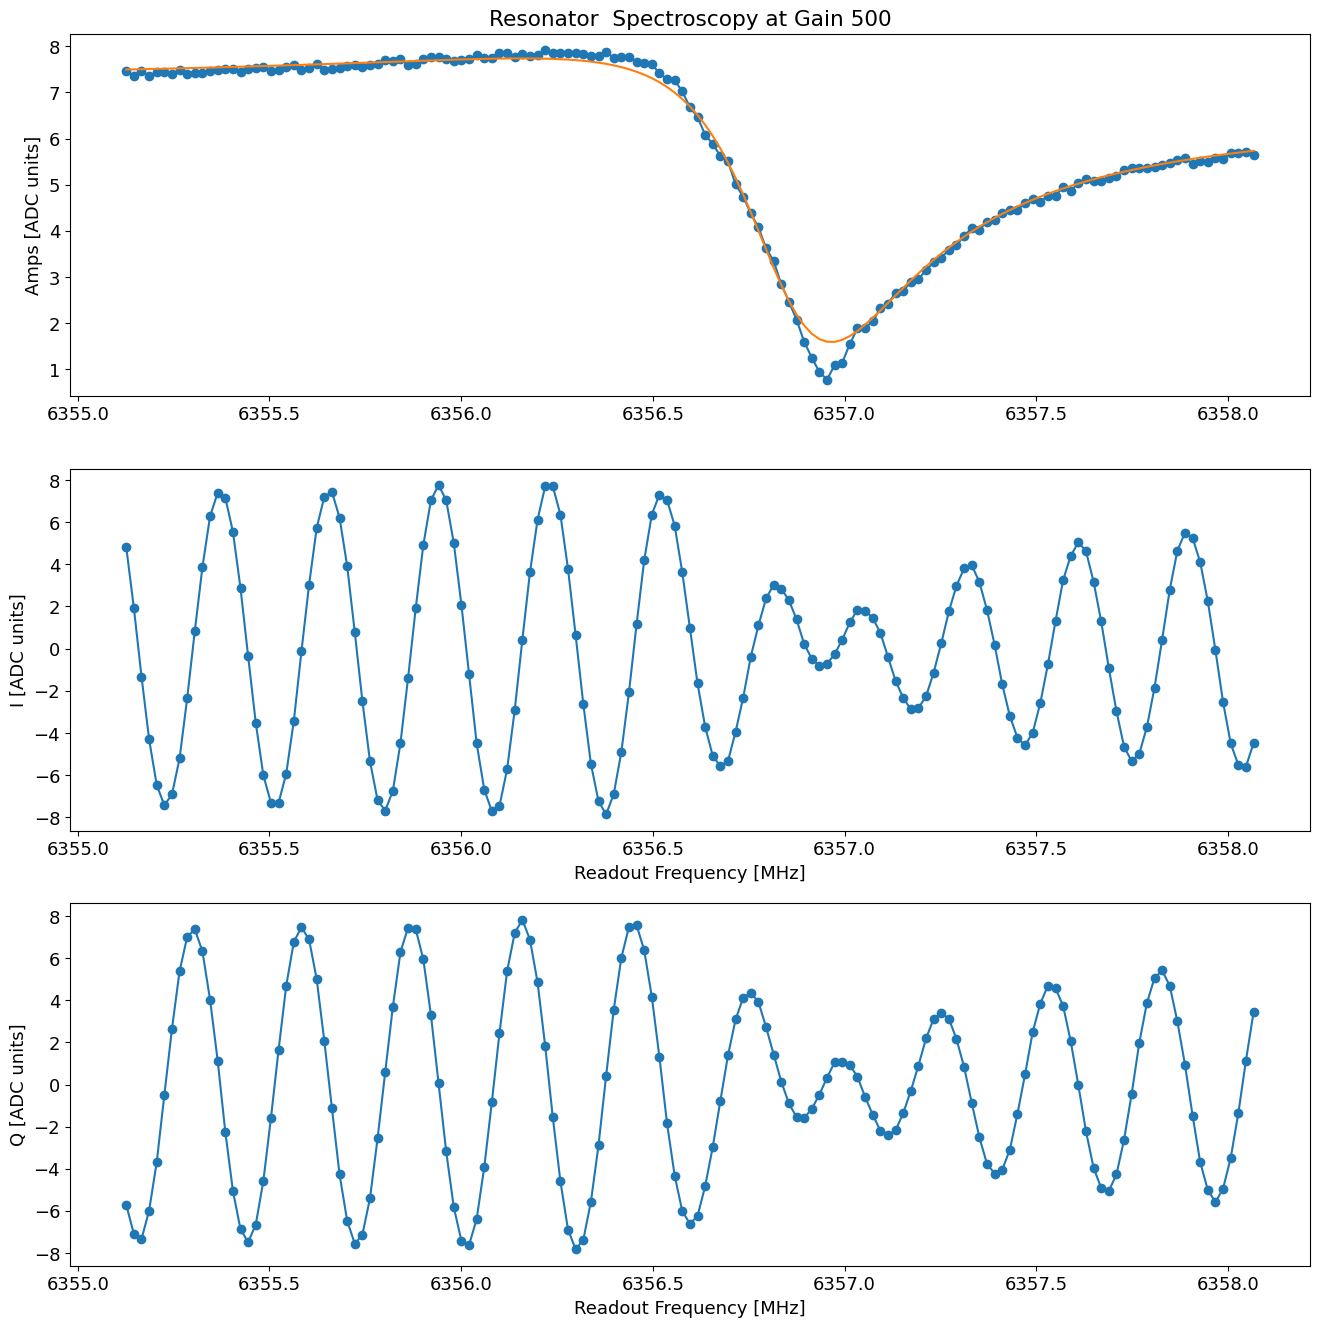

*Set cfg resonator 2 chi to -0.2516764316933404 from -0.2023529495272669*


In [149]:
# Need a tuned up pi pulse for this
#for i in range(num_qubits):
for i in range(2,3):
    print(i)
    chi = cfg.make_chi(soc, expt_path, cfg_path, i, go=True)
    chi_val = auto_cfg.device.readout.frequency[i] - chi.data['fit'][0]
    auto_cfg = config.update_readout(cfg_file, 'chi', float(chi_val), i)

## Automated retune once things are working

<Pyro4.core.Proxy at 0x2abb08346d0; not connected; for PYRO:obj_3a63e8b1017e43cfa50282e99cb22b2d@192.168.137.233:34767>


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00005_single_shot_qubit1.h5
Unrotated:
Ig 0.5681818181818181 +/- 0.615730891212173 	 Qg -0.1774891774891775 +/- 0.6260396203167644 	 Amp g 0.5952587560365503
Ie 1.0303030303030303 +/- 0.659860513048712 	 Qe -0.7727272727272727 +/- 0.6662224317488753 	 Amp e 1.2878787878787878
hi
Rotated:
Ig 0.4931672462070518 +/- 0.615730891212173 	 Qg 0.3382101504694899 +/- 0.6260396203167644 	 Amp g 0.5979966877935378
Ie 1.265207838128366 +/- 0.659860513048712 	 Qe 0.33965253717351457 +/- 0.6662224317488753 	 Amp e 1.3100056181825555


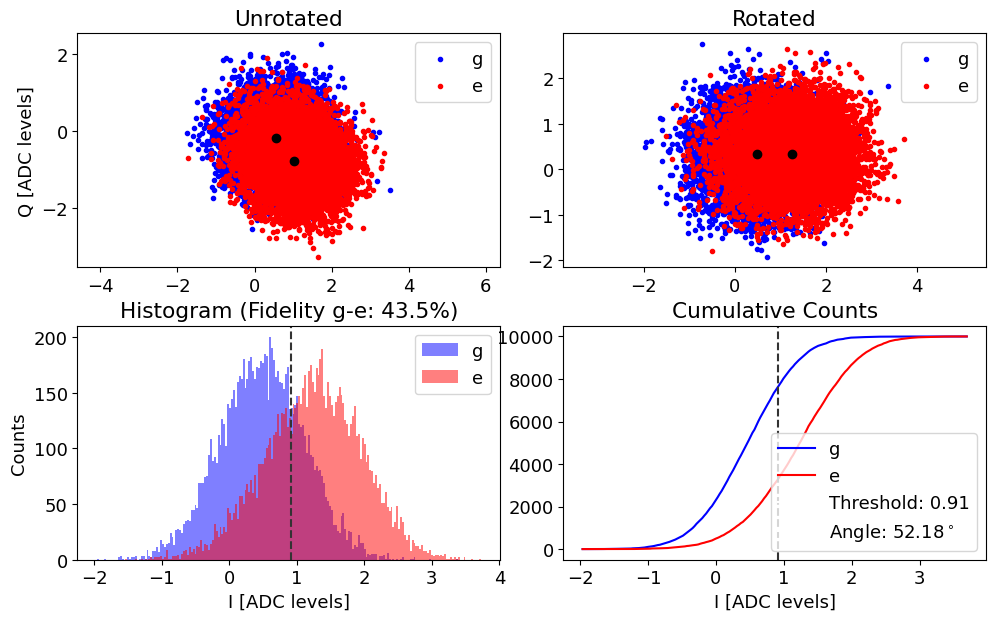

ge fidelity (%): 43.472173608680436
rotation angle (deg): 52.175535350370005
threshold ge: 0.907631314713317
*Set cfg resonator 1 phase to 52.176 from 52.227*
*Set cfg resonator 1 threshold to 0.9076 from 1.0985*
*Set cfg resonator 1 fidelity to 0.4347 from 0.5305*
<Pyro4.core.Proxy at 0x2abb38cc5b0; not connected; for PYRO:obj_3a63e8b1017e43cfa50282e99cb22b2d@192.168.137.233:34767>


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00006_single_shot_qubit2.h5
Unrotated:
Ig -0.3826879271070615 +/- 0.3766377929275304 	 Qg -3.1334201106410675 +/- 0.5616063291377912 	 Amp g 3.1567026529787974
Ie 0.23983078424991863 +/- 0.7229172726306672 	 Qe -2.793361535958347 +/- 0.5493416946566678 	 Amp e 2.8036382569164493
hi
Rotated:
Ig -1.8371541270442726 +/- 0.3766377929275304 	 Qg -2.5734577867189645 +/- 0.5616063291377912 	 Amp g 3.1619329952641744
Ie -1.1408371248611364 +/- 0.7229172726306672 	 Qe -2.613212529106133 +/- 0.5493416946566678 	 Amp e 2.8513837110670845


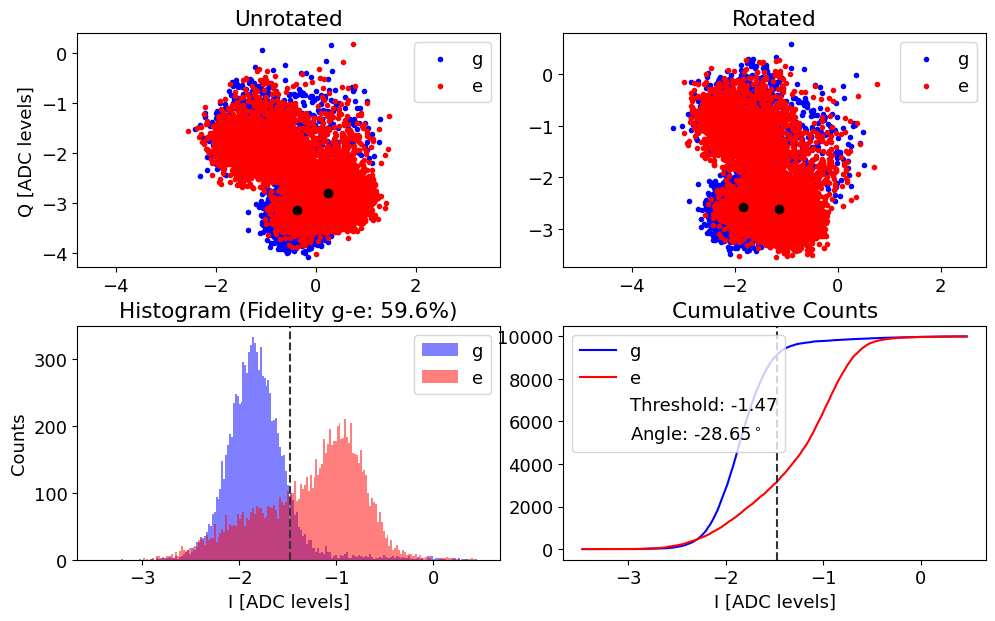

ge fidelity (%): 59.64192838567713
rotation angle (deg): -28.64612137013331
threshold ge: -1.4692021226355731
*Set cfg resonator 2 phase to -28.646 from -12.625*
*Set cfg resonator 2 threshold to -1.4692 from -0.6319*
*Set cfg resonator 2 fidelity to 0.5964 from 0.6512*
<Pyro4.core.Proxy at 0x2abb4994250; not connected; for PYRO:obj_3a63e8b1017e43cfa50282e99cb22b2d@192.168.137.233:34767>


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

Saving C:\_Data\Coherence\Tuning_2024_06_18\00006_single_shot_qubit3.h5
Unrotated:
Ig -0.4780344939798243 +/- 0.27654026649862173 	 Qg 0.29856817442238853 +/- 0.261236158817867 	 Amp g 0.5636132825018094
Ie 0.9669703872437357 +/- 0.6385867128619366 	 Qe 0.8097949886104784 +/- 0.7356948709960671 	 Amp e 1.2612690646269515
hi
Rotated:
Ig -0.35045865502608786 +/- 0.27654026649862173 	 Qg 0.4415349552470325 +/- 0.261236158817867 	 Amp g 0.5637148087354931
Ie 1.2351910609005536 +/- 0.6385867128619366 	 Qe 0.4946891235563604 +/- 0.7356948709960671 	 Amp e 1.3305691586285904


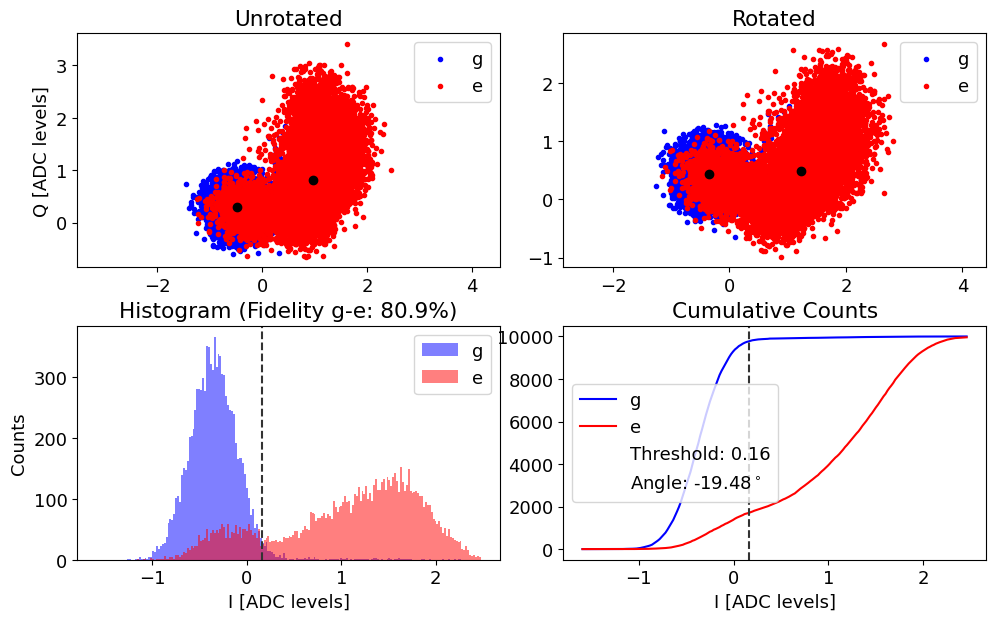

ge fidelity (%): 80.87174348697394
rotation angle (deg): -19.48321860944428
threshold ge: 0.15733741802742318
*Set cfg resonator 3 phase to -19.483 from -0.0*
*Set cfg resonator 3 threshold to 0.1573 from 0.2727*
*Set cfg resonator 3 fidelity to 0.8087 from 0.0082*


In [41]:
#for i in range(4):
for i in range(1,4):
    shot = cfg.make_singleshot(soc, expt_path, cfg_path, i, go=True)
    config.update_readout(cfg_file, 'phase', round(float(shot.data['angle']),3), i);
    config.update_readout(cfg_file, 'threshold', round(float(shot.data['thresholds'][0]),4), i);
    config.update_readout(cfg_file, 'fidelity', round(float(shot.data['fids'][0]),4), i);

    # amp_rabi = cfg.make_amprabi(soc, expt_path, cfg_path, i, go=True)
    # auto_cfg = config.update_qubit(cfg_file, ('pulses','pi_ge','gain'), int(amp_rabi.data['pi_length']), i)

    # t2r=cfg.make_t2r(soc, expt_path, cfg_path, i, go=True)
    # auto_cfg = config.update_qubit(cfg_file, 'f_ge', round(float(t2r.data['new_freq']),4), i)
    # config.update_qubit(cfg_file, 'T2r', round(float(t2r.data['fit_avgi'][3]),2), i)


    # t1 = cfg.make_t1(soc, expt_path, cfg_path, i, go=True) 
    # auto_cfg = config.update_qubit(cfg_file, 'T1', round(float(t1.data['new_t1']),2), i)


#t2e = cfg.make_t2e(soc, expt_path, cfg_path, i,go=True, ramsey_freq=0.02, step=1.4, npts=400)